# DA201: Data Analytics using Python
# Main Assignment

## Introduction

I will be using this Jupyter Notebook to produce the data analysis for the assignment. Insights from the analysis will be recorded on this notebook too alongside the analytical code snippet. A version of this notebook along with all associated datafiles have been uploaded into a special repo within my GitHub Page. It is linked further down below.

## Preparing the environment

In [1]:
# Import libraries required.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup
import string
from datetime import datetime
from matplotlib import rcParams
from sklearn import linear_model


# Set plotting options.
sns.set_palette("pastel")
sns.set(font_scale=2)

# Setting up date-parser using a lambda.
# This will give us the dates in a format that we require for aggregations & indexing.
d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

# Import CSV files containing the data required for the Assignment.
# Applying the date-parser along with loading the data.
tweets = pd.read_csv('tweets.csv')
cov = pd.read_csv('covid_19_uk_cases.csv', parse_dates=['Date'], date_parser=d_parser)
vac = pd.read_csv('covid_19_uk_vaccinated.csv', parse_dates=['Date'], date_parser=d_parser)

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\2157869591.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
C:\Users\saura\AppData\Local\Temp\ipykernel_20644\2157869591.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')


## Hyperlinking URL to My GitHub Repo

- All work relating to this Assignment can be found on my [GitHub Pages](https://github.com/SauravChakers?tab=repositories).

- Screenshot demo. 

!['My Github screenshot](https://github.com/SauravChakers/Data_Analytics_using_Python/blob/main/MyGitHub%20Screenshot.png?raw=True)



## What is GitHub?
- A free online resource for organising, storing and sharing code and related work with others.
- Cloud storage for any file type but is most often used for code files and related supporting documents.
- A platform to collaborate, network and pitch work amongst developers in real time.
- The most widely used version control system amongst developers and coders.

## How does GitHub add value?
- It has a built-in version control feature which can then be used to:
    - Track changes and those responsible for the changes. 
    - Create localised copy away from production version where upgrades or fixes can first be tested ahead of implementation.
    - Roll back to previous versions. 
- Version control is useful on collaborative projects where simultaneous work may be required.
- It can be used to track progressive performance of coders.
- As it is open source, projects can potentially draw upon resources of the entire community of coders.
- Provide a simple back up of work in the cloud asides from any local networks and hardware.

## Data Exploration

### Tweets DataFrame

In [2]:
# Determine the number of rows and columns.
print(tweets.shape)

# Can see 3960 rows and 21 columns.
# Implies we should have 3960 tweets in the dataframe.

(3960, 21)


In [3]:
# Determine the data types in the DataFrames.
print(tweets.dtypes)

# Can see this is NOT all text data.
# Should be able to generate some quantitative analysis aside qualitative.

created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object


In [4]:
# Get information on the contents of the columns.
tweets.info()

# Looks like the main content of each tweet should be contained in the column 'text'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [5]:
# View the first 5 rows to see whats in each column.
tweets.head()

# Confirmed that 'text' column contains the main content of the tweets.
# Contains # which should give us a field for qualitative/sentiment analysis.
# The newest tweet in the data set was created on 23 May 2022.

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [6]:
# View the last 5 rows.
print(tweets.tail())

# Can see from heads and tails that there are 21 columns and no footer.
# Can see that some tweets have been retweeted and or made favorite.
# Will be useful to analyse these to see if they generate any insights.
# Earliest tweet in the dataset was created on 16 May 2022.
# So data is only 1 week's worth.
# Be interesting to see what the themes are in this dataset after more than 2 yrs.
# Since the onset of Cov 19 (cov df)
# More than 15 months since vaccinations were rolled out. (vac df)

      created_at            id        id_str  \
3955  19/05/2022  1.527280e+18  1.527280e+18   
3956  18/05/2022  1.526910e+18  1.526910e+18   
3957  17/05/2022  1.526550e+18  1.526550e+18   
3958  16/05/2022  1.526190e+18  1.526190e+18   
3959  15/05/2022  1.525900e+18  1.525900e+18   

                                                   text truncated  \
3955  NORTHERN IRELAND.  Announced on THURSDAY.\n\nC...     False   
3956  NORTHERN IRELAND.  Announced on WEDNESDAY.\n\n...     False   
3957  NORTHERN IRELAND.  Announced on TUESDAY.\n\nCO...     False   
3958  NORTHERN IRELAND.  Announced on MONDAY.\n\nCOV...     False   
3959  NORTHERN IRELAND.    \n\nNI #COVID19 data has ...     False   

                                                 source  \
3955  <a href="http://twitter.com/#!/download/ipad" ...   
3956  <a href="http://twitter.com/#!/download/ipad" ...   
3957  <a href="http://twitter.com/#!/download/ipad" ...   
3958  <a href="http://twitter.com/#!/download/ipad" ...   
3

In [7]:
# Determine null values.
tweets.isnull().sum()

# Can see 1 row may have all columns blanks.
# Can see at 830 tweets were considered as possibly sensitive by Twitter algos.

created_at                      1
id                              1
id_str                          1
text                            1
truncated                       1
source                          1
in_reply_to_status_id        3960
in_reply_to_status_id_str    3960
in_reply_to_user_id          3960
in_reply_to_user_id_str      3960
in_reply_to_screen_name      3960
contributors                 3960
is_quote_status                 1
retweet_count                   0
favorite_count                  0
favorited                       1
retweeted                       1
lang                            1
possibly_sensitive            830
quoted_status_id             3960
quoted_status_id_str         3960
dtype: int64

### Cases DataFrame 

In [8]:
# Determine key characteristics of each DataFrame.
# View the first 5 rows.
print(cov.head())

# Can see index value 0 is header.
# Date Values are in rows i/o columns.
# Time-series often easier if time values are on columns.
# Lots of geographical data; need to consider usefulness.

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code       Date  \
0  Latin America and the Caribbean                        29 2020-01-22   
1  Latin America and the Caribbean                        29 2020-01-23   
2  Latin America and the Caribbean                        29 2020-01-24   
3  Latin America and the Caribbean                        29 2020-01-25   
4  Latin America and the Caribbean                        29 2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        0.0   

In [9]:
# View the last 5 rows.
print(cov.tail())

# All rows until the end have changes in row values.

     Province/State  Country/Region      Lat   Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom  55.3781 -3.436                      GBR   
7580         Others  United Kingdom  55.3781 -3.436                      GBR   
7581         Others  United Kingdom  55.3781 -3.436                      GBR   
7582         Others  United Kingdom  55.3781 -3.436                      GBR   
7583         Others  United Kingdom  55.3781 -3.436                      GBR   

      Sub-region Name  Intermediate Region Code       Date    Deaths  \
7579  Northern Europe                         0 2021-10-10  137735.0   
7580  Northern Europe                         0 2021-10-11  137763.0   
7581  Northern Europe                         0 2021-10-12  137944.0   
7582  Northern Europe                         0 2021-10-13  138080.0   
7583  Northern Europe                         0 2021-10-14  138237.0   

          Cases  Recovered  Hospitalised  
7579  8154306.0        0.0         378.0  


In [10]:
# Determine the number of rows and columns.
print(cov.shape)

# Can see 7584 rows and 21 columns.
# Date format is dd/mm/yyyy
# Changing to date parser at load -in.

(7584, 12)


In [11]:
# Determine the data types in the DataFrames.
print(cov.dtypes)
# Can see date parser at load-in worked.
# Date in correct pandas format.

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object


In [12]:
# Determine null values.
cov.isnull().sum()

# Can see very few missing values.
# Will determine what to do with them later.

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

### Vaccinated DataFrame

In [13]:
# Determine key characteristics of each DataFrame.
# View the first 5 rows.
print(vac.head())

# Can see index value 0 is header.
# Lots of geographical data that is duplicated with cov df.
# Starting date for both data frames are the same: 22 Jan 2020.
# They should be merged.

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code       Date  \
0  Latin America and the Caribbean                        29 2020-01-22   
1  Latin America and the Caribbean                        29 2020-01-23   
2  Latin America and the Caribbean                        29 2020-01-24   
3  Latin America and the Caribbean                        29 2020-01-25   
4  Latin America and the Caribbean                        29 2020-01-26   

   Vaccinated  First Dose  Second Dose  
0           0           0        

In [14]:
# View the last 5 rows.
print(vac.tail())

# Perhaps the last rows dont have any data; need to check.
# Will change dates to columns i/o rows here too.

     Province/State  Country/Region      Lat   Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom  55.3781 -3.436                      GBR   
7580         Others  United Kingdom  55.3781 -3.436                      GBR   
7581         Others  United Kingdom  55.3781 -3.436                      GBR   
7582         Others  United Kingdom  55.3781 -3.436                      GBR   
7583         Others  United Kingdom  55.3781 -3.436                      GBR   

      Sub-region Name  Intermediate Region Code       Date  Vaccinated  \
7579  Northern Europe                         0 2021-10-10        1070   
7580  Northern Europe                         0 2021-10-11        1300   
7581  Northern Europe                         0 2021-10-12        1482   
7582  Northern Europe                         0 2021-10-13           0   
7583  Northern Europe                         0 2021-10-14           0   

      First Dose  Second Dose  
7579        1216         1070  
7580      

In [15]:
# Determine the number of rows and columns.
print(vac.shape)

# Can see 7584 rows and 11 columns.

(7584, 11)


In [16]:
# Determine the data types in the DataFrames.
print(vac.dtypes)

# Can see date parsing successful here too.

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object


In [17]:
# Remove spaces in columns name
vac.columns = vac.columns.str.replace(' ','_')

# Makes running formulas easier.

In [18]:
# Determine null values.
vac.isnull().sum()

# Can see no missing values.
# Given all column names are shared with Cases it may be a good idea to merge the two DataFrames.
# Do we need all this geographical data? Removing it might make the DataFrame more resource efficient.

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO_3166-1_Alpha_3-Codes    0
Sub-region_Name             0
Intermediate_Region_Code    0
Date                        0
Vaccinated                  0
First_Dose                  0
Second_Dose                 0
dtype: int64

## Filtering the data for region Gibraltar

I will filter the data for a small subset.
This should give me an idea of how to approach the wider data set once it has been wrangled.

### Cases Data

In [19]:
# Are there default column names?
list(cov.columns)

# Yes, headers are defined as default column names.

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'ISO 3166-1 Alpha 3-Codes',
 'Sub-region Name',
 'Intermediate Region Code',
 'Date',
 'Deaths',
 'Cases',
 'Recovered',
 'Hospitalised']

In [20]:
# Filter the data by Province/State = Gibraltar
# Gib is a boolean variable with True or False in it.
Gib = cov[cov['Province/State'] == 'Gibraltar']

In [21]:
# Calculating daily changes to Deaths, Cases, Recovered.
# Create new Column for each variable with 'Day' prefix.
# Calculate the daily change using shift(1) and subtract functions.
Gib['Day_Deaths']=Gib['Deaths'] -Gib['Deaths'].shift(1)
Gib['Day_Cases']=Gib['Cases'] -Gib['Cases'].shift(1)
Gib['Day_Recovered']=Gib['Recovered'] -Gib['Recovered'].shift(1)

# There may be a neater way to do this calculation using loc function.

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\1625518070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gib['Day_Deaths']=Gib['Deaths'] -Gib['Deaths'].shift(1)
C:\Users\saura\AppData\Local\Temp\ipykernel_20644\1625518070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gib['Day_Cases']=Gib['Cases'] -Gib['Cases'].shift(1)
C:\Users\saura\AppData\Local\Temp\ipykernel_20644\1625518070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [22]:
# Checking when Gibraltar first reported a case.
# This should should 1 in Daily_Cases column.
# Need to filter in column Cases > 0
Filt_Gib = Gib[Gib['Cases'] > 0] 
Filt_Gib



# Proof that the daily changes calculations above work!
# First case reported on 4 Mar 2020.
# Total 97 Deaths in Gibraltar for the period of the data.
# Total 5727 Cases in Gibraltar for the period of the data.
# See that Daily Cases at start of period of data was very low.
# See that Daily Cases at end of period of data still comparatively high.
# Note multiple peaks and troughs in daily data through the period of the data.

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Day_Deaths,Day_Cases,Day_Recovered
3834,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3835,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-03-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3836,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-03-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3837,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-03-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3838,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-03-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0,0.0,13.0,0.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0,0.0,29.0,0.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0,0.0,27.0,0.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0,0.0,25.0,0.0


In [23]:
# When was first death recorded in Gibraltar?
# Need to filter in column Deaths > 0
Filt_Gib = Gib[Gib['Deaths'] > 0] 
Filt_Gib

# See that first Death reported in Gibraltar on 11 Nov 2020
# Daily cases at this time of c. mid 20s not much different to daily cases at end of period of data.

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Day_Deaths,Day_Cases,Day_Recovered
4086,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-11-11,1.0,842.0,712.0,1958.0,1.0,28.0,10.0
4087,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-11-12,1.0,864.0,719.0,1985.0,0.0,22.0,7.0
4088,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-11-13,1.0,876.0,729.0,2030.0,0.0,12.0,10.0
4089,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-11-14,1.0,887.0,742.0,2037.0,0.0,11.0,13.0
4090,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-11-15,1.0,902.0,754.0,2108.0,0.0,15.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0,0.0,13.0,0.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0,0.0,29.0,0.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0,0.0,27.0,0.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0,0.0,25.0,0.0


In [24]:
# Aggregate Data by month.
Gib_monthly = Gib.set_index('Date', inplace=True)
Gib.index = pd.to_datetime(Gib.index)
Gib.resample('1M').sum()

# This is much easier to extract insights out of.
# Deaths in winter 2020/21 starting from Oct 2020 & peaking in Jan 2021 with 70 deaths in that month.
# Dramartic decline in Deaths after Feb 2021. Be interesting to investigate link with vaccine dataframe.
# Sharp rise in cases from Sept 2020 after which it becomes even more dramatic in the winter of 2020/21.
# Cases remain very high until Sept 2021 and but declines significantly in Oct 2021.
# Sharp rise in daily cases during Dec 2020 & Jan 2021. 
# Stabilises thereafter barring a spike in July & Aug 2021.
# Looks like strong correlation between peaks of cases, deaths and hospitalisation numbers albeit with some lags.
# Note that aggregating by month changes the deaths, cases, recovered and hospitalised.
# May be a neater and more flexible way to aggregate the daily data.
# Will need to account for these changes ahead of analysis in the wider data.

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised,Day_Deaths,Day_Cases,Day_Recovered
Date,,,,,,,,,,
2020-01-31,361.4080,-53.5360,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,1048.0832,-155.2544,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31,1120.3648,-165.9616,0,0.0,474.0,153.0,6096.0,0.0,69.0,34.0
2020-04-30,1084.2240,-160.6080,0,0.0,3737.0,2833.0,69420.0,0.0,75.0,97.0
2020-05-31,1120.3648,-165.9616,0,0.0,4650.0,4430.0,41418.0,0.0,26.0,18.0
2020-06-30,1084.2240,-160.6080,0,0.0,5265.0,5080.0,18689.0,0.0,7.0,27.0
2020-07-31,1120.3648,-165.9616,0,0.0,5619.0,5531.0,7765.0,0.0,10.0,5.0
2020-08-31,1120.3648,-165.9616,0,0.0,6936.0,6088.0,3846.0,0.0,101.0,51.0
2020-09-30,1084.2240,-160.6080,0,0.0,10175.0,9022.0,4951.0,0.0,108.0,112.0


### Vaccinated Data

In [25]:
# Filter the data by Province/State = Gibraltar
# Gib is a boolean variable with True or False in it.
Gib = vac[vac['Province/State'] == 'Gibraltar']
Gib

# First_Dose, Second_Dose=Vaccinated are daily numbers.

,Province/State,Country/Region,Lat,Long,ISO_3166-1_Alpha_3-Codes,Sub-region_Name,Intermediate_Region_Code,Date,Vaccinated,First_Dose,Second_Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,2431,2763,2431
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,2954,3646,2954
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,3368,4606,3368
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,0,0,0


In [26]:
# Calculating difference between 'First Dose' and 'Second Dose' values.
# This will represent the individuals who have taken First Dose but not Second Dose.
# Call this 'Part_Vac'.
# Data in Vaccinated and Second Dose Columns appear to be identical.
# Need to check across the main dateset if every row is duplicate across both columns.
# If they are, will need to delete one column; will make the notebook less memory intensive.
Gib['Part_Vac']=Gib['First_Dose'] - Gib['Second_Dose']


C:\Users\saura\AppData\Local\Temp\ipykernel_20644\2317734961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gib['Part_Vac']=Gib['First_Dose'] - Gib['Second_Dose']


In [27]:
# Checking when Gibraltar first administered the first dose.
# This should should at least 1 in First_Dose column.
# Need to filter in column First_Dose > 0
Filt_Gib = Gib[Gib['First_Dose'] > 0] 
Filt_Gib

# Can see first day of vaccine being rolled out was 11 Jan 2021.
# Strange that there were 2596 second doses also administered on that day. 
# So where are the corresponding first doses for these? Perhaps during clinical trials?
# Too many data points to visually discern any meaningful insights.
# Need to aggregate data in monthly intervals.

,Province/State,Country/Region,Lat,Long,ISO_3166-1_Alpha_3-Codes,Sub-region_Name,Intermediate_Region_Code,Date,Vaccinated,First_Dose,Second_Dose,Part_Vac
4147,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-01-11,2596,18134,2596,15538
4148,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-01-12,2008,25958,2008,23950
4149,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-01-13,1218,34868,1218,33650
4150,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-01-14,657,39587,657,38930
4151,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-01-15,526,42665,526,42139
...,...,...,...,...,...,...,...,...,...,...,...,...
4417,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-08,3634,3961,3634,327
4418,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-09,4185,3924,4185,-261
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,2431,2763,2431,332
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,2954,3646,2954,692


In [28]:
# Aggregate Data by month.
Gib_monthly = Gib.set_index('Date', inplace=True)
Gib.index = pd.to_datetime(Gib.index)
Gib.resample('1M').sum()

# Large increase in the number of first doses being adminstered in the first few months.
# Stabilises from Mar to Jun 2021 and then declines sharply.
# One month lag between peaks of first & second dose.
# Part vaccinated declines sharply as second dose adminstrations start to outstrip first dose.
# No meaningful insight aside from above on part vaccinated.
# Time Series & correlations might make it easier to understand.
# Need to check aggregates as columns aggregated as sum. 
# Will need to apply count to columns which are already aggregated.
# Apply sum to columns which are daily data.

,Lat,Long,Intermediate_Region_Code,Vaccinated,First_Dose,Second_Dose,Part_Vac
Date,,,,,,,
2020-01-31,361.4080,-53.5360,0,0,0,0,0
2020-02-29,1048.0832,-155.2544,0,0,0,0,0
2020-03-31,1120.3648,-165.9616,0,0,0,0,0
2020-04-30,1084.2240,-160.6080,0,0,0,0,0
2020-05-31,1120.3648,-165.9616,0,0,0,0,0
2020-06-30,1084.2240,-160.6080,0,0,0,0,0
2020-07-31,1120.3648,-165.9616,0,0,0,0,0
2020-08-31,1120.3648,-165.9616,0,0,0,0,0
2020-09-30,1084.2240,-160.6080,0,0,0,0,0


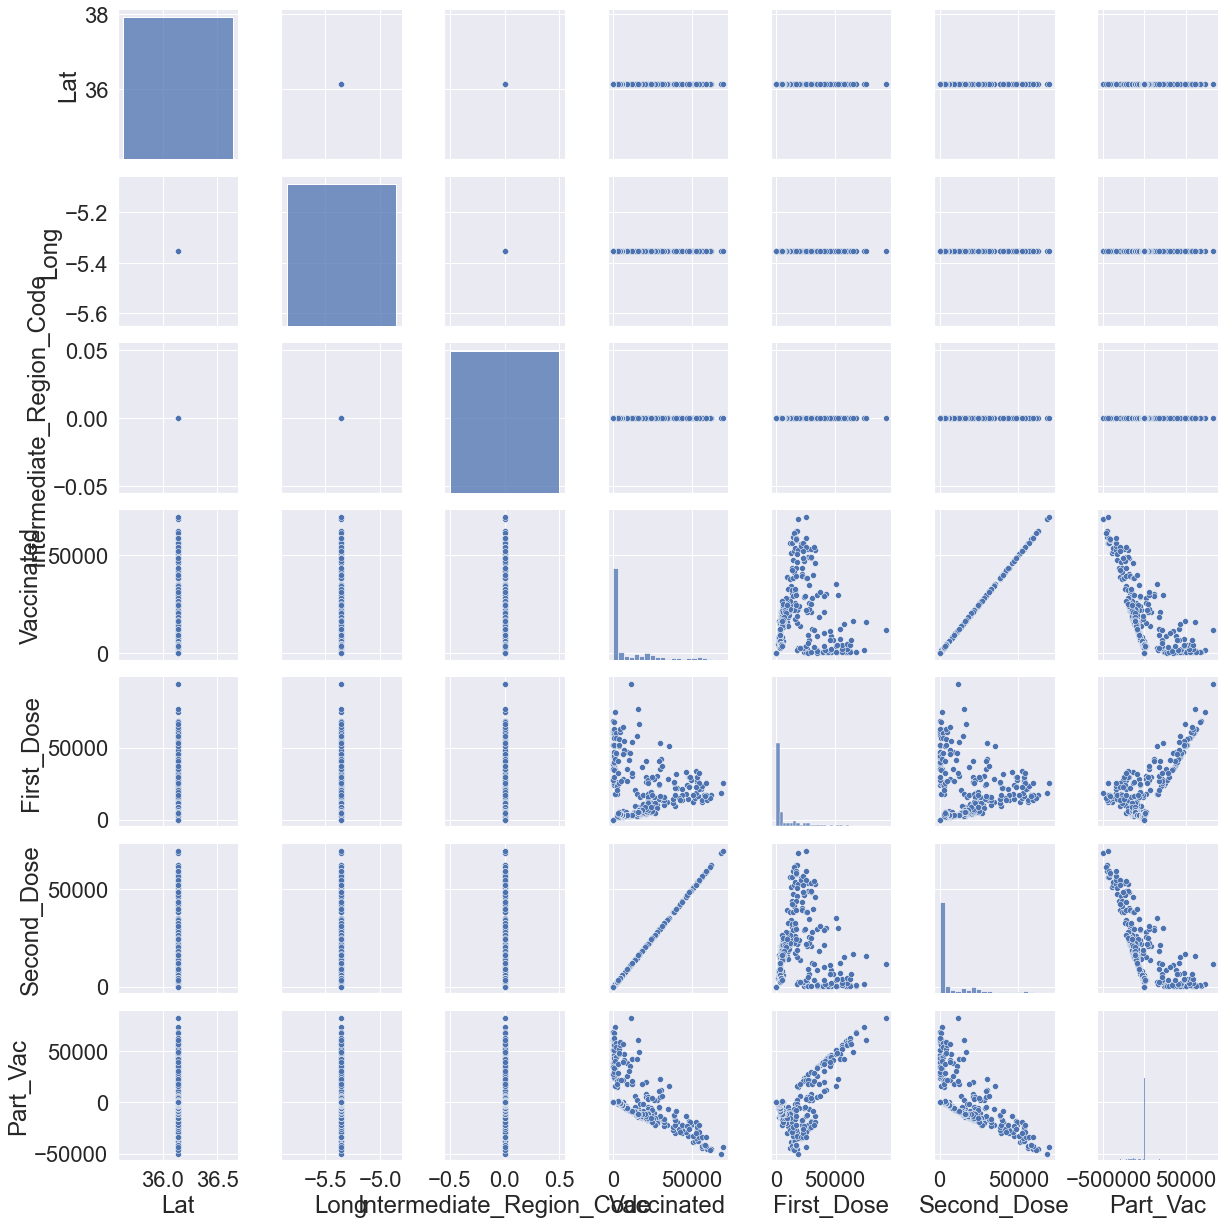

In [29]:
# Trying pairplot to visualise relationships between the variables.
sns.pairplot(Gib)

# Too many columns.
# Very noisy visualisation of Dataframe.
# Will return on the wider data set once it has been wrangled.

## Expectations on the wider data

Filtering the Data so far for just Gibraltar was an useful exercise. For the fuller data, this exercise has shown:
- 1. Where calculated columns need to be added & manipulated to incorporate changes made during aggregation.
- 2. Some columns which can be deleted as they contain no meaningful data for our analysis.
- 3. Daily data is too noisy to gather any visual insights.
- 4. Data will need to be resampled into monthly output.
- 5. The two datasets Cov & Vac need to be merged to generate comparative analysis and linkages between the two.
- 6. Total numbers are useful to highlight local peaks and troughs as well factors such as seasonality.
- 7. Trends over time offer broader insights into correlations between variables.
- 8. Full analysis will need to consider both aggregate functions as well as timeseries.
- 9. Visualisation not useful at this stage as there is too much noise in the data: too many unncesesary columns, very large variation in data scales and very likely the presence of outliers.
- 10. We now know how to wrangle the data best such that we may anlyse it.

## Data Wrangling

### Merging Cases & Vaccinated DataFrames 

In [30]:
#'covid' DataFrame will merge 'cov' and 'vac' DataFrames.
covid = pd.merge(cov, vac, left_index=True, right_index=True)

print(covid.shape)
print(cov.shape)
print(vac.shape)

# Can see that there are the same number of rows in covid as there were in cov and vac.
# Can see that the number of columns in covid add up to the total columns in cov and vac.

(7584, 23)
(7584, 12)
(7584, 11)


### Cleaning up the Merged DataFrame

#### Shape of the Merged DataFrame

In [31]:
# Lets first pull up the column names in 'covid' to identify duplications & redundancies.
# Will also determine data types at the same time.
print(covid.dtypes)

# Delete all duplicate and redundant columns from merged DataFrame 'covid'.

Province/State_x                    object
Country/Region_x                    object
Lat_x                              float64
Long_x                             float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date_x                      datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Province/State_y                    object
Country/Region_y                    object
Lat_y                              float64
Long_y                             float64
ISO_3166-1_Alpha_3-Codes            object
Sub-region_Name                     object
Intermediate_Region_Code             int64
Date_y                      datetime64[ns]
Vaccinated                           int64
First_Dose                           int64
Second_Dose                          int64
dtype: obje

In [32]:
# Checking for any duplicated columns & dropping them.
covid = covid.loc[:,~covid.apply(lambda x: x.duplicated(),axis=1).all()].copy()
print(covid.dtypes)

# All columns which are duplicated are deleted/dropped.

Province/State_x                    object
Country/Region_x                    object
Lat_x                              float64
Long_x                             float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date_x                      datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
Vaccinated                           int64
First_Dose                           int64
dtype: object


In [33]:
# Delete redundant columns from the dataframe 'covid'.
# These columns contain no useful information for our analysis.
covid_cleaned = covid.drop(covid.columns[[1, 2, 3, 4, 5, 6]], axis=1) 
# Realigning names of some columns in covid_cleaned to original dataset.
covid_cleaned.rename(columns={"Province/State_x": "Province/State", 
                              "Date_x": "Date"}, inplace=True)

In [34]:
# Check data types & shape of covid
print(covid_cleaned.dtypes)
print(covid_cleaned.shape)

# Output as designed.

Province/State            object
Date              datetime64[ns]
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
Vaccinated                 int64
First_Dose                 int64
dtype: object
(7584, 8)


#### Dealing with Missing values

In [35]:
# Check for missing/null values.
covid_cleaned.isnull().sum()

# Can see 2 rows have nulls values
# Ties up with earlier wrangling done on Cases DataFrame.
# Selective 0 values should be replaced.

Province/State    0
Date              0
Deaths            2
Cases             2
Recovered         2
Hospitalised      2
Vaccinated        0
First_Dose        0
dtype: int64

In [36]:
# Filter out rows which does not contain any values in the columns of interest.
# This reduces demand for computational power.
covid_clean = covid_cleaned.drop(covid_cleaned[(covid_cleaned['Deaths'] == 0) & 
                            (covid_cleaned['Cases'] == 0) & 
                            (covid_cleaned['Recovered'] == 0) & 
                            (covid_cleaned['Hospitalised'] == 0) &
                            (covid_cleaned['Vaccinated'] == 0) & 
                            (covid_cleaned['First_Dose'] == 0)].index)

# covid_clean is the new baseline DataFrame to use.
# Will use this for all analysis going forward.
print(covid_clean.shape)
# Reduces rows from 7584 to 6942.
# Will enhance efficiency of DataFrame.

(6942, 8)


In [37]:
# View the 2 rows with the null values.
covid_clean[covid_clean.isna().any(axis=1)]


,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose
875,Bermuda,2020-09-21,NaN,NaN,NaN,NaN,0,0
876,Bermuda,2020-09-22,NaN,NaN,NaN,NaN,0,0


In [38]:
# Lets examine the DateFrame around these rows.
# Will help determine how these null values should be replaced.
covid_clean.iloc[750:758]

# No changes to any column except Hospitalised on these two days.
# We can backfill Hospitalised for the missing values given values are rising.
# We can replace other NaN values either with backfill or forward fill.
# As there is no change in the values either direction.

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose
872,Bermuda,2020-09-18,9.0,178.0,164.0,73.0,0,0
873,Bermuda,2020-09-19,9.0,180.0,166.0,78.0,0,0
874,Bermuda,2020-09-20,9.0,180.0,166.0,84.0,0,0
875,Bermuda,2020-09-21,NaN,NaN,NaN,NaN,0,0
876,Bermuda,2020-09-22,NaN,NaN,NaN,NaN,0,0
877,Bermuda,2020-09-23,9.0,181.0,167.0,104.0,0,0
878,Bermuda,2020-09-24,9.0,181.0,167.0,111.0,0,0
879,Bermuda,2020-09-25,9.0,181.0,167.0,121.0,0,0


In [39]:
# Replace missing values with backward fill in Hospitalised. 
covid_clean['Hospitalised'] = covid_clean['Hospitalised'].fillna(method='bfill')
# Replace other Null values
covid_clean = covid_clean.fillna(method='ffill')
#Check for any other null values
covid_clean[covid_clean.isna().any(axis=1)]

# No more null values left.

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose


In [40]:
# Recheck the same rows to verify what values have been inserted.
covid_clean.iloc[750:758]

# Replacements successful.

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose
872,Bermuda,2020-09-18,9.0,178.0,164.0,73.0,0,0
873,Bermuda,2020-09-19,9.0,180.0,166.0,78.0,0,0
874,Bermuda,2020-09-20,9.0,180.0,166.0,84.0,0,0
875,Bermuda,2020-09-21,9.0,180.0,166.0,104.0,0,0
876,Bermuda,2020-09-22,9.0,180.0,166.0,104.0,0,0
877,Bermuda,2020-09-23,9.0,181.0,167.0,104.0,0,0
878,Bermuda,2020-09-24,9.0,181.0,167.0,111.0,0,0
879,Bermuda,2020-09-25,9.0,181.0,167.0,121.0,0,0


In [41]:
# Check for duplicate rows in the DataFrame.
duplicateRows = covid_clean[covid_clean.duplicated()]

#view duplicate rows
duplicateRows

# No Duplicates found. 

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose


### Data Analysis

#### Adding Calculated Columns

In [42]:
# We need to identify the difference between application of First & Dose.
# This represents the individuals who have taken the First Dose of the vaccine but not Second Dose.
# This is the target group for the marketing campaign.
# Call this 'Part_Vac'.
covid_clean['Part_Vac'] = covid_cleaned['First_Dose'] - covid_cleaned['Vaccinated']

# Top row in all calculated columns will return Null value as there is no preceeding value.
# This is expected when using shift function for calculations which requires a preceedig value to perform the calculation.
# Replace this row NaN values with 0.
covid_clean.fillna(0)

,Province/State,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose,Part_Vac
65,Anguilla,2020-03-27,0.0,0.0,0.0,763.0,0,0,0
66,Anguilla,2020-03-28,0.0,2.0,0.0,869.0,0,0,0
67,Anguilla,2020-03-29,0.0,2.0,0.0,1000.0,0,0,0
68,Anguilla,2020-03-30,0.0,2.0,0.0,1165.0,0,0,0
69,Anguilla,2020-03-31,0.0,2.0,0.0,1323.0,0,0,0
...,...,...,...,...,...,...,...,...,...
7579,Others,2021-10-10,137735.0,8154306.0,0.0,378.0,1070,1216,146
7580,Others,2021-10-11,137763.0,8193769.0,0.0,386.0,1300,1604,304
7581,Others,2021-10-12,137944.0,8231437.0,0.0,386.0,1482,2027,545
7582,Others,2021-10-13,138080.0,8272883.0,0.0,0.0,0,0,0


In [43]:
# Upsample datetime objects into month and year.
# Will be needed for aggregate functions.
# Will reduce the frequency of the data.
# Create new columns Month & Year.

covid_clean['Month'] = covid_clean['Date'].dt.month
covid_clean['Year'] = covid_clean['Date'].dt.year
covid_clean['Week'] = covid_clean['Date'].dt.week
covid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 65 to 7583
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6942 non-null   object        
 1   Date            6942 non-null   datetime64[ns]
 2   Deaths          6942 non-null   float64       
 3   Cases           6942 non-null   float64       
 4   Recovered       6942 non-null   float64       
 5   Hospitalised    6942 non-null   float64       
 6   Vaccinated      6942 non-null   int64         
 7   First_Dose      6942 non-null   int64         
 8   Part_Vac        6942 non-null   int64         
 9   Month           6942 non-null   int64         
 10  Year            6942 non-null   int64         
 11  Week            6942 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 705.0+ KB


C:\Users\saura\AppData\Local\Temp\ipykernel_20644\2554176832.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  covid_clean['Week'] = covid_clean['Date'].dt.week


#### Grouping Data

In [44]:
# Changing the index to Date.
# This converts the DataFrame into a timeseries data.
covid_clean.set_index('Date', inplace=True)
covid_clean.info()

# With Date as Index, we can now filter DataFrame with Dates.
# Much easier to work with for time series data in this format.
# No need to transpose dates into column values.
# Avoids creating a very wide DataFrame which is potentially more unwieldy.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6942 entries, 2020-03-27 to 2021-10-14
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6942 non-null   object 
 1   Deaths          6942 non-null   float64
 2   Cases           6942 non-null   float64
 3   Recovered       6942 non-null   float64
 4   Hospitalised    6942 non-null   float64
 5   Vaccinated      6942 non-null   int64  
 6   First_Dose      6942 non-null   int64  
 7   Part_Vac        6942 non-null   int64  
 8   Month           6942 non-null   int64  
 9   Year            6942 non-null   int64  
 10  Week            6942 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 650.8+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

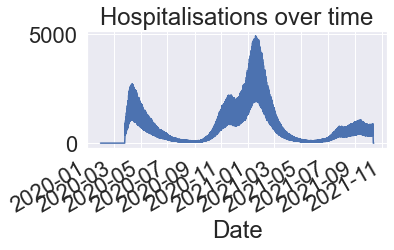

In [45]:
# Basic visualisation to check if time series created.
covid_clean.Hospitalised.plot(title="Hospitalisations over time")
plt.tight_layout(); plt.show

# Shows that creation of time series is successful.

In [46]:
# Identifying the highest number of individuals who have recieved first dose but not second dose.
# This is a point in time static identification of this value.
# This is available in Part_Vac Column
# Identifying max value in Part Vac_Column & returning all corresponding row values to identify Province/State

covid_clean[covid_clean['Part_Vac']==covid_clean['Part_Vac'].max()]

# So Gibraltar had the highest number of individuals who had received the first dose but not second dose
# This was on 20 Mar 2021.

,Province/State,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose,Part_Vac,Month,Year,Week
Date,,,,,,,,,,,
2021-03-20,Gibraltar,94.0,4270.0,4148.0,696.0,11497,94038,82541,3,2021,11


In [47]:
# Looking for peak roll out of first dose
# This period represents the peak month for the administration of the first dose.
covid_clean.groupby('Month')['Part_Vac'].sum()

# We can see that this was Month 2 = Feb 2021
# On a monthly aggregate, the highest number of individuals who received first dose but not second dose was in 02/21.
# The peak value for such people = Part_Vac was 10,657,478

Month
1      6906984
2     10657478
3      7174358
4     -7229099
5     -5662444
6     -1929658
7     -3318574
8     -3316289
9     -1216262
10       51525
11           0
12           0
Name: Part_Vac, dtype: int64

In [48]:
# Show how Part_Vac evolved over time in each 'Province/State'.
# Group the DataFrame by multiple Groups as columns.

covid_clean.groupby(['Month','Province/State'], as_index=False)['Part_Vac'].sum()

,Month,Province/State,Part_Vac
0,1,Anguilla,725230
1,1,Bermuda,414419
2,1,British Virgin Islands,759770
3,1,Cayman Islands,518025
4,1,Channel Islands,483486
...,...,...,...
139,12,Isle of Man,0
140,12,Montserrat,0
141,12,Others,0
142,12,"Saint Helena, Ascension and Tristan da Cunha",0


In [49]:
# Group the DataFrame for multiple functions.
# Region wide month on month break down of total and average first & second dose administered.
# Recall that Second dose = Vaccinated.
covid_clean.groupby(['Month','Year','Province/State'], as_index=False)['First_Dose', 'Vaccinated'].agg(['sum', 'mean'])

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\2793199935.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_clean.groupby(['Month','Year','Province/State'], as_index=False)['First_Dose', 'Vaccinated'].agg(['sum', 'mean'])


First_Dose  \
                                                               sum   
Month Year Province/State                                            
1     2020 Others                                                0   
      2021 Anguilla                                         736027   
           Bermuda                                          420588   
           British Virgin Islands                           771077   
           Cayman Islands                                   525737   
...                                                            ...   
12    2020 Isle of Man                                           0   
           Montserrat                                            0   
           Others                                                0   
           Saint Helena, Ascension and Tristan da Cunha          0   
           Turks and Caicos Islands                              0   

                                                                       \
                                                                 mean   
Month Year Province/State                                               
1     2020 Others                                            0.000000   
      2021 Anguilla                                      23742.806452   
           Bermuda                                       13567.354839   
           British Virgin Islands                        24873.451613   
           Cayman Islands                                16959.258065   
...                                                               ...   
12    2020 Isle of Man                                       0.000000   
           Montserrat                                        0.000000   
           Others                                            0.000000   
           Saint Helena, Ascension and Tristan da Cunha      0.000000   
           Turks and Caicos Islands                          0.000000   

                                                        Vaccinated              
                                                               sum        mean  
Month Year Province/State                                                       
1     2020 Others                                                0    0.000000  
      2021 Anguilla                                          10797  348.290323  
           Bermuda                                            6169  199.000000  
           British Virgin Islands                            11307  364.741935  
           Cayman Islands                                     7712  248.774194  
...                                                            ...         ...  
12    2020 Isle of Man                                           0    0.000000  
           Montserrat                                            0    0.000000  
           Others                                                0    0.000000  
           Saint Helena, Ascension and Tristan da Cunha          0    0.000000  
           Turks and Caicos Islands                              0    0.000000  

[242 rows x 4 columns]

In [50]:
# Identifying highest % of individuals who have received first dose but not second dose.
# Will need to add calculated column.
# Not clear what the denominator in this function should be
# Individuals who received first dose but not second dose = Part_Vac.
# The denominator is individuals who have recieved just First Dose.
# First Dose is a proxy for eligibility for  receiving Second Dose too. 
# This is a good indicator of "riskiness" of any row of data.
# In theory this is where vaccination campaign needs to target as least people are fully vaccinated vs eligibility

# Inserting Calculated Column
covid_clean['Ratio_of_Int'] = ((covid_clean['Part_Vac'])*100 / covid_clean['First_Dose'])

# The lower the value in this column, the worse it is!

# Identifying max value in % at Risk column & returning all corresponding row values to identify Province/State
covid_clean[covid_clean['Ratio_of_Int']==covid_clean['Ratio_of_Int'].min()]

# This is in the Province/State = '	Saint Helena, Ascension and Tristan da Cunha'
# This is a point in time observation.

,Province/State,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose,Part_Vac,Month,Year,Week,Ratio_of_Int
Date,,,,,,,,,,,,
2021-07-18,"Saint Helena, Ascension and Tristan da Cunha",0.0,4.0,4.0,217.0,6444,909,-5535,7,2021,28,-608.910891


In [51]:
# Show monthly aggregated for Ratio_of_Int.
covid_clean.groupby('Month')['Ratio_of_Int'].sum()

# Confirms again that Month 2 = Feb 2021 was peak month when most people had received just the first dose.
# In this example, this feature is called Peak Ratio of Interest.

Month
1      24695.478395
2      32491.662863
3      23161.205551
4     -78050.161154
5     -43170.738858
6     -16556.582764
7     -85723.695542
8    -104455.711497
9     -57596.321912
10      1787.356069
11         0.000000
12         0.000000
Name: Ratio_of_Int, dtype: float64

In [52]:
# Calculating Ratio of people who have received seond dose over the first dose.
# Calling this 'First Percentage'
# Inserting Calculated Column
covid_clean['First_Percentage'] = (covid_clean['First_Dose']) / (covid_clean['Vaccinated'])

# See what the DataFrame now looks like after addition of all calculated columns.
covid_clean

,Province/State,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First_Dose,Part_Vac,Month,Year,Week,Ratio_of_Int,First_Percentage
Date,,,,,,,,,,,,,
2020-03-27,Anguilla,0.0,0.0,0.0,763.0,0,0,0,3,2020,13,NaN,NaN
2020-03-28,Anguilla,0.0,2.0,0.0,869.0,0,0,0,3,2020,13,NaN,NaN
2020-03-29,Anguilla,0.0,2.0,0.0,1000.0,0,0,0,3,2020,13,NaN,NaN
2020-03-30,Anguilla,0.0,2.0,0.0,1165.0,0,0,0,3,2020,14,NaN,NaN
2020-03-31,Anguilla,0.0,2.0,0.0,1323.0,0,0,0,3,2020,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,Others,137735.0,8154306.0,0.0,378.0,1070,1216,146,10,2021,40,12.006579,1.136449
2021-10-11,Others,137763.0,8193769.0,0.0,386.0,1300,1604,304,10,2021,41,18.952618,1.233846
2021-10-12,Others,137944.0,8231437.0,0.0,386.0,1482,2027,545,10,2021,41,26.887025,1.367746


In [53]:
# Rearrange columns so that they have a more logical order in the DataFrame.
# Makes the DataFrame look neater too.

covid_clean = covid_clean[['Week', 'Month', 'Year', 'Province/State', 'Deaths', 'Cases', 'Recovered', 
                           'Hospitalised', 'First_Dose', 'Part_Vac', 'Vaccinated', 
                           'First_Percentage', 'Ratio_of_Int']]

# Check how the rearranged DataFrame looks.
covid_clean

# Confirmed that the columns now flow more logically and looks neater.

,Week,Month,Year,Province/State,Deaths,Cases,Recovered,Hospitalised,First_Dose,Part_Vac,Vaccinated,First_Percentage,Ratio_of_Int
Date,,,,,,,,,,,,,
2020-03-27,13,3,2020,Anguilla,0.0,0.0,0.0,763.0,0,0,0,NaN,NaN
2020-03-28,13,3,2020,Anguilla,0.0,2.0,0.0,869.0,0,0,0,NaN,NaN
2020-03-29,13,3,2020,Anguilla,0.0,2.0,0.0,1000.0,0,0,0,NaN,NaN
2020-03-30,14,3,2020,Anguilla,0.0,2.0,0.0,1165.0,0,0,0,NaN,NaN
2020-03-31,14,3,2020,Anguilla,0.0,2.0,0.0,1323.0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,40,10,2021,Others,137735.0,8154306.0,0.0,378.0,1216,146,1070,1.136449,12.006579
2021-10-11,41,10,2021,Others,137763.0,8193769.0,0.0,386.0,1604,304,1300,1.233846,18.952618
2021-10-12,41,10,2021,Others,137944.0,8231437.0,0.0,386.0,2027,545,1482,1.367746,26.887025


In [54]:
# To see if there is are differences over time in application of First and Second Dose.
# The difference between application of First & Second Dose is available in Part_Vac Column
# Lets pull up how the difference between application of First and Second Dose has evolved over monthly intervals.
# Resample the data for Monthly aggregate of this column.
t_series_Part_Vac=covid_clean['Part_Vac'].resample('M').sum()
t_series_Part_Vac

# We can see that Vaccine Roll out was in  Jan 2021
# We can see that until Mar 2021, there were many more First Doses administered vs Second Dose.
# From April 2021, we can see that the trend reverses.
# More Second Doses being adminstered than First Dose.
# This is the period when the vaccinated numbers will rise.
# Quickly resample the dataframe to confirm below.
# Interesting to note that again in Oct 2021, there is a period when first doses > second dose.
# Likely that those who didnt take the vaccine in the first wave are now complying with vaccine mandate.

Date
2020-01-31           0
2020-02-29           0
2020-03-31           0
2020-04-30           0
2020-05-31           0
2020-06-30           0
2020-07-31           0
2020-08-31           0
2020-09-30           0
2020-10-31           0
2020-11-30           0
2020-12-31           0
2021-01-31     6906984
2021-02-28    10657478
2021-03-31     7174358
2021-04-30    -7229099
2021-05-31    -5662444
2021-06-30    -1929658
2021-07-31    -3318574
2021-08-31    -3316289
2021-09-30    -1216262
2021-10-31       51525
Freq: M, Name: Part_Vac, dtype: int64

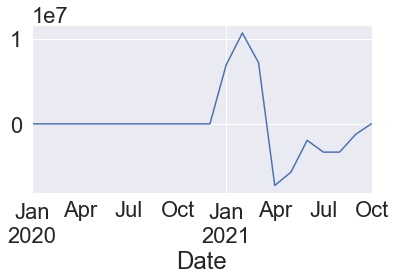

In [55]:
# Creating a basic visualisation
%matplotlib inline
t_series_Part_Vac.plot()
plt.tight_layout()

# Visualisation is basic.

In [56]:
# Resampling the entire dataframe into Monthly aggregates.
# This is for across all the regions in the UK.
cov_agg = covid_clean.resample('M').agg({'Cases': 'sum', 'Deaths': 'sum', 'First_Dose': 'sum', 
                                         'Vaccinated': 'sum', 'Part_Vac': 'sum', 'Ratio_of_Int': 'sum',
                                        'First_Percentage': 'sum'})
# Lets see the DataFrame
cov_agg

# We are missing regional variations but good overview of how each variable evoloved on a monthly basis.
# So we can see that end of 2020, there were 2,488,780 cases of Covid-19 reported across the UK.
# By the end of 2020, over 73,512 people had died from Covid-19 infection across the UK.
# Death rates continue to rise sharply until Mar 2021.
# This coincides with above where we saw that the bulk of the population was partly vaccinated by then.
# Suggests that even just the first dose of the vaccines may have helped to reduce deaths.
# At the very least, they helped reduce the rate of increase of deaths.

,Cases,Deaths,First_Dose,Vaccinated,Part_Vac,Ratio_of_Int,First_Percentage
Date,,,,,,,
2020-01-31,2.0,0.0,0,0,0,0.000000,0.000000
2020-02-29,606.0,0.0,0,0,0,0.000000,0.000000
2020-03-31,283199.0,12580.0,0,0,0,0.000000,0.000000
2020-04-30,3328344.0,457216.0,0,0,0,0.000000,0.000000
2020-05-31,7016710.0,1030749.0,0,0,0,0.000000,0.000000
2020-06-30,8213357.0,1182674.0,0,0,0,0.000000,0.000000
2020-07-31,9120400.0,1270661.0,0,0,0,0.000000,0.000000
2020-08-31,9933759.0,1284798.0,0,0,0,0.000000,0.000000
2020-09-30,11564506.0,1254505.0,0,0,0,0.000000,0.000000


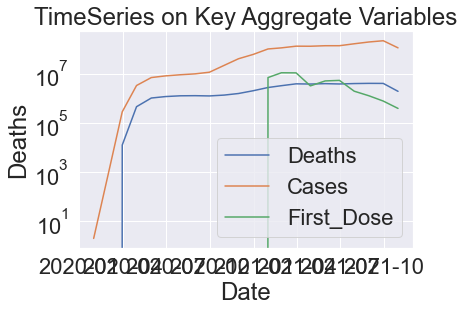

In [57]:
# A basic visualisation of the key columns will help really emphasise findings above. 
# Columns to be visualised are "Deaths", "Cases", "First_Dose"
# Big differences in scale of range of data so will plot on log
# Set out the lineplot variables.
g=sns.lineplot(x="Date", y="Deaths", data=cov_agg)
g=sns.lineplot(x="Date", y ="Cases", data=cov_agg)
g=sns.lineplot(x="Date", y ="First_Dose", data=cov_agg)

# Set y axis scale.
g.set_yscale('log')

# Set out chart title.
g.set_title('TimeSeries on Key Aggregate Variables')

# Set out legend.
g.legend(['Deaths', 'Cases', 'First_Dose'])

# Set out size
sns.set(rc = {'figure.figsize':(8,10)})

# Confirms that Deaths flatline once the vaccine is introduced.
# Need to do better on scales etc on these visualisations.

### Finding and cleaning for Outliers using z-score

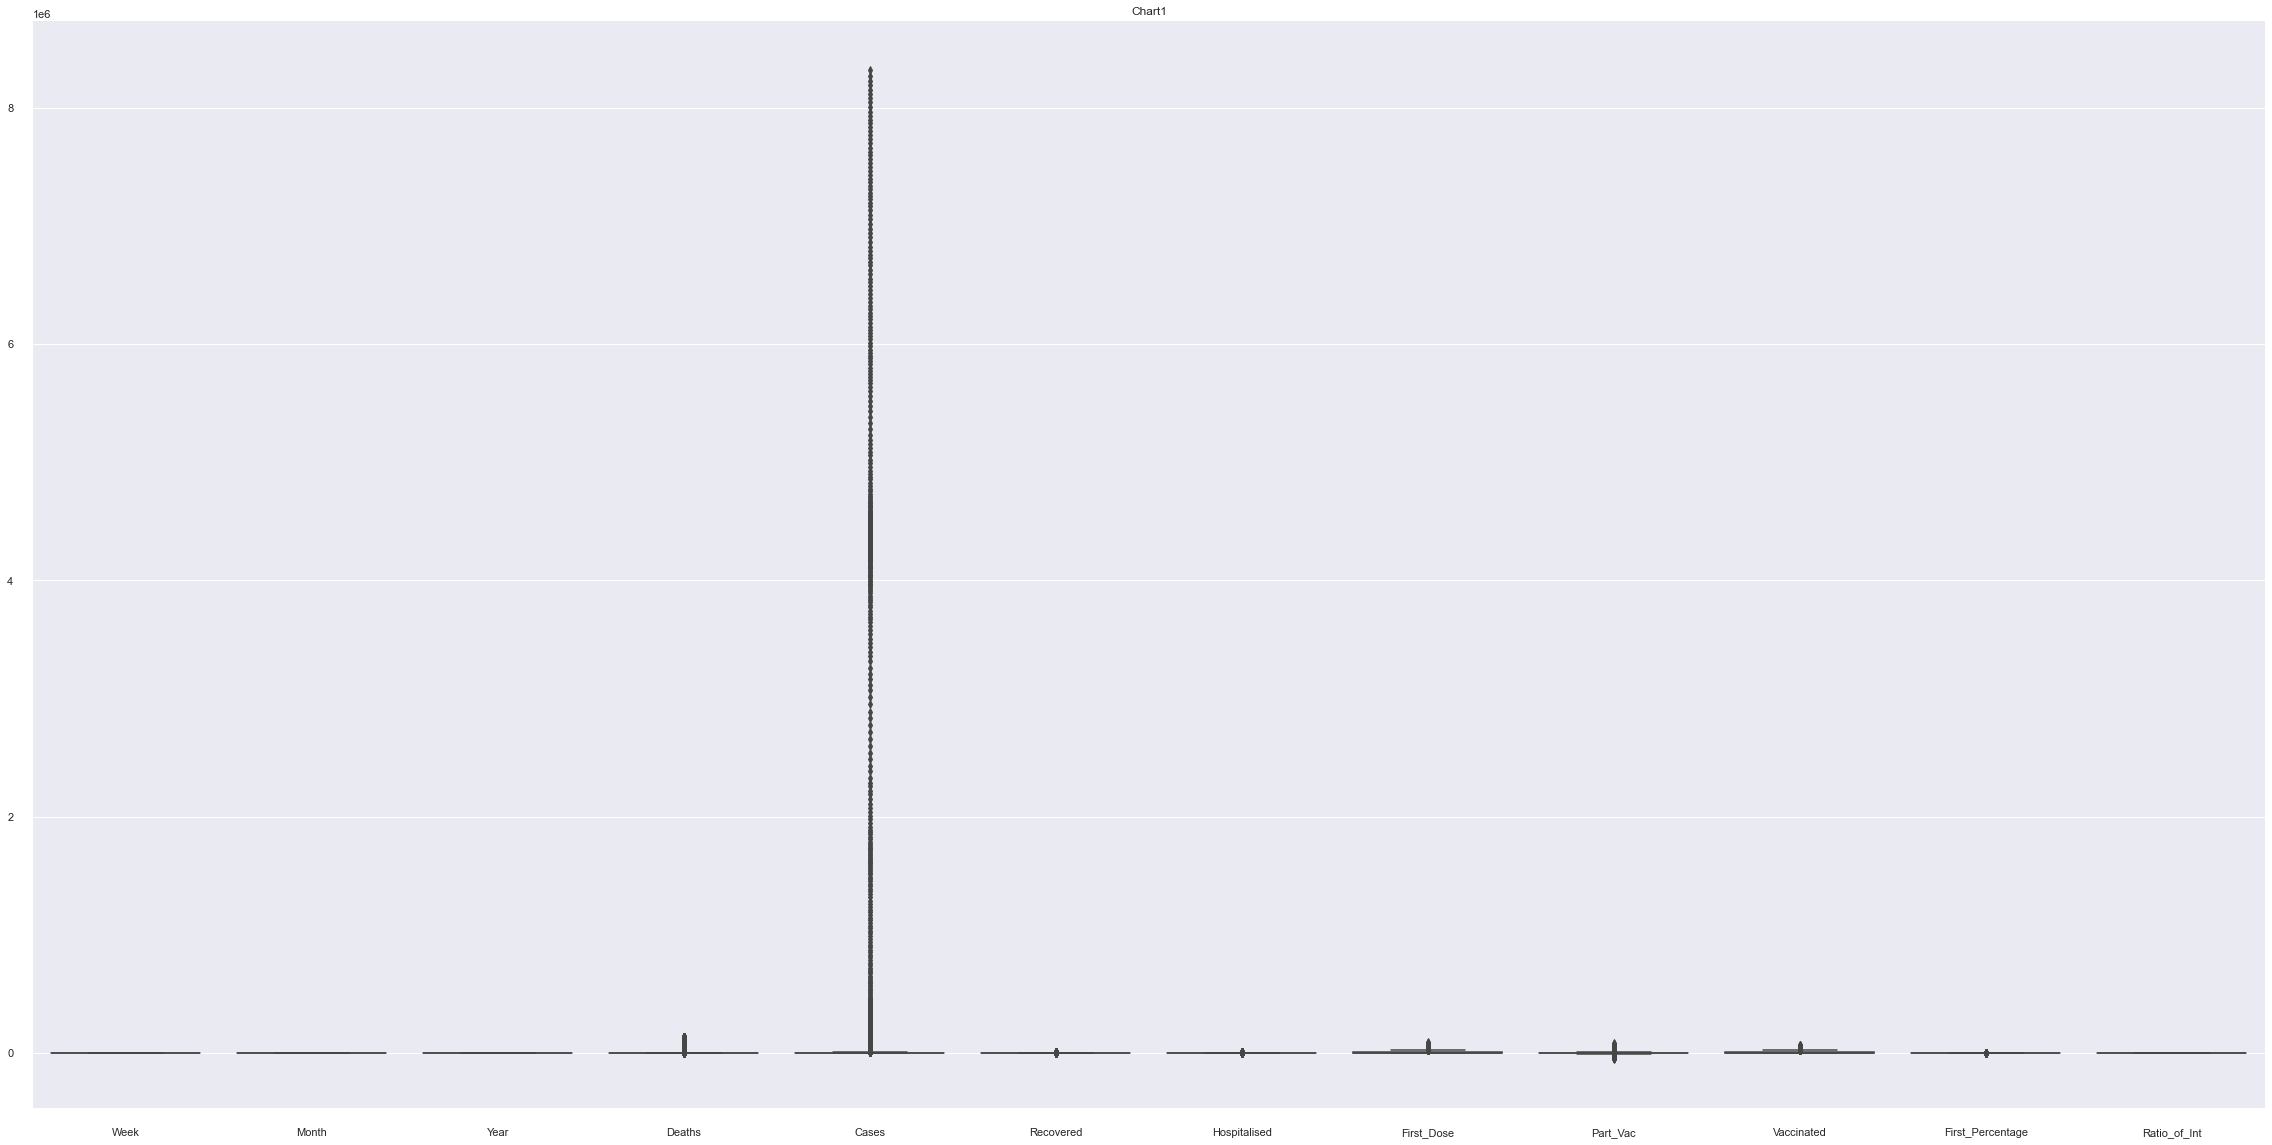

In [58]:
# Before handling outliers, I will identify them for each column.
# Boxplot is best for visualising outliers.
rcParams['figure.figsize'] = 40,20
sns.boxplot(data=covid_clean).set(title='Chart1')
sns.despine(offset=10, trim=True);

# Column Values are on too many orders of magnitude to visualise in one chart.
# For visualisation, Use log scales to negate the differences in scales of the column values.

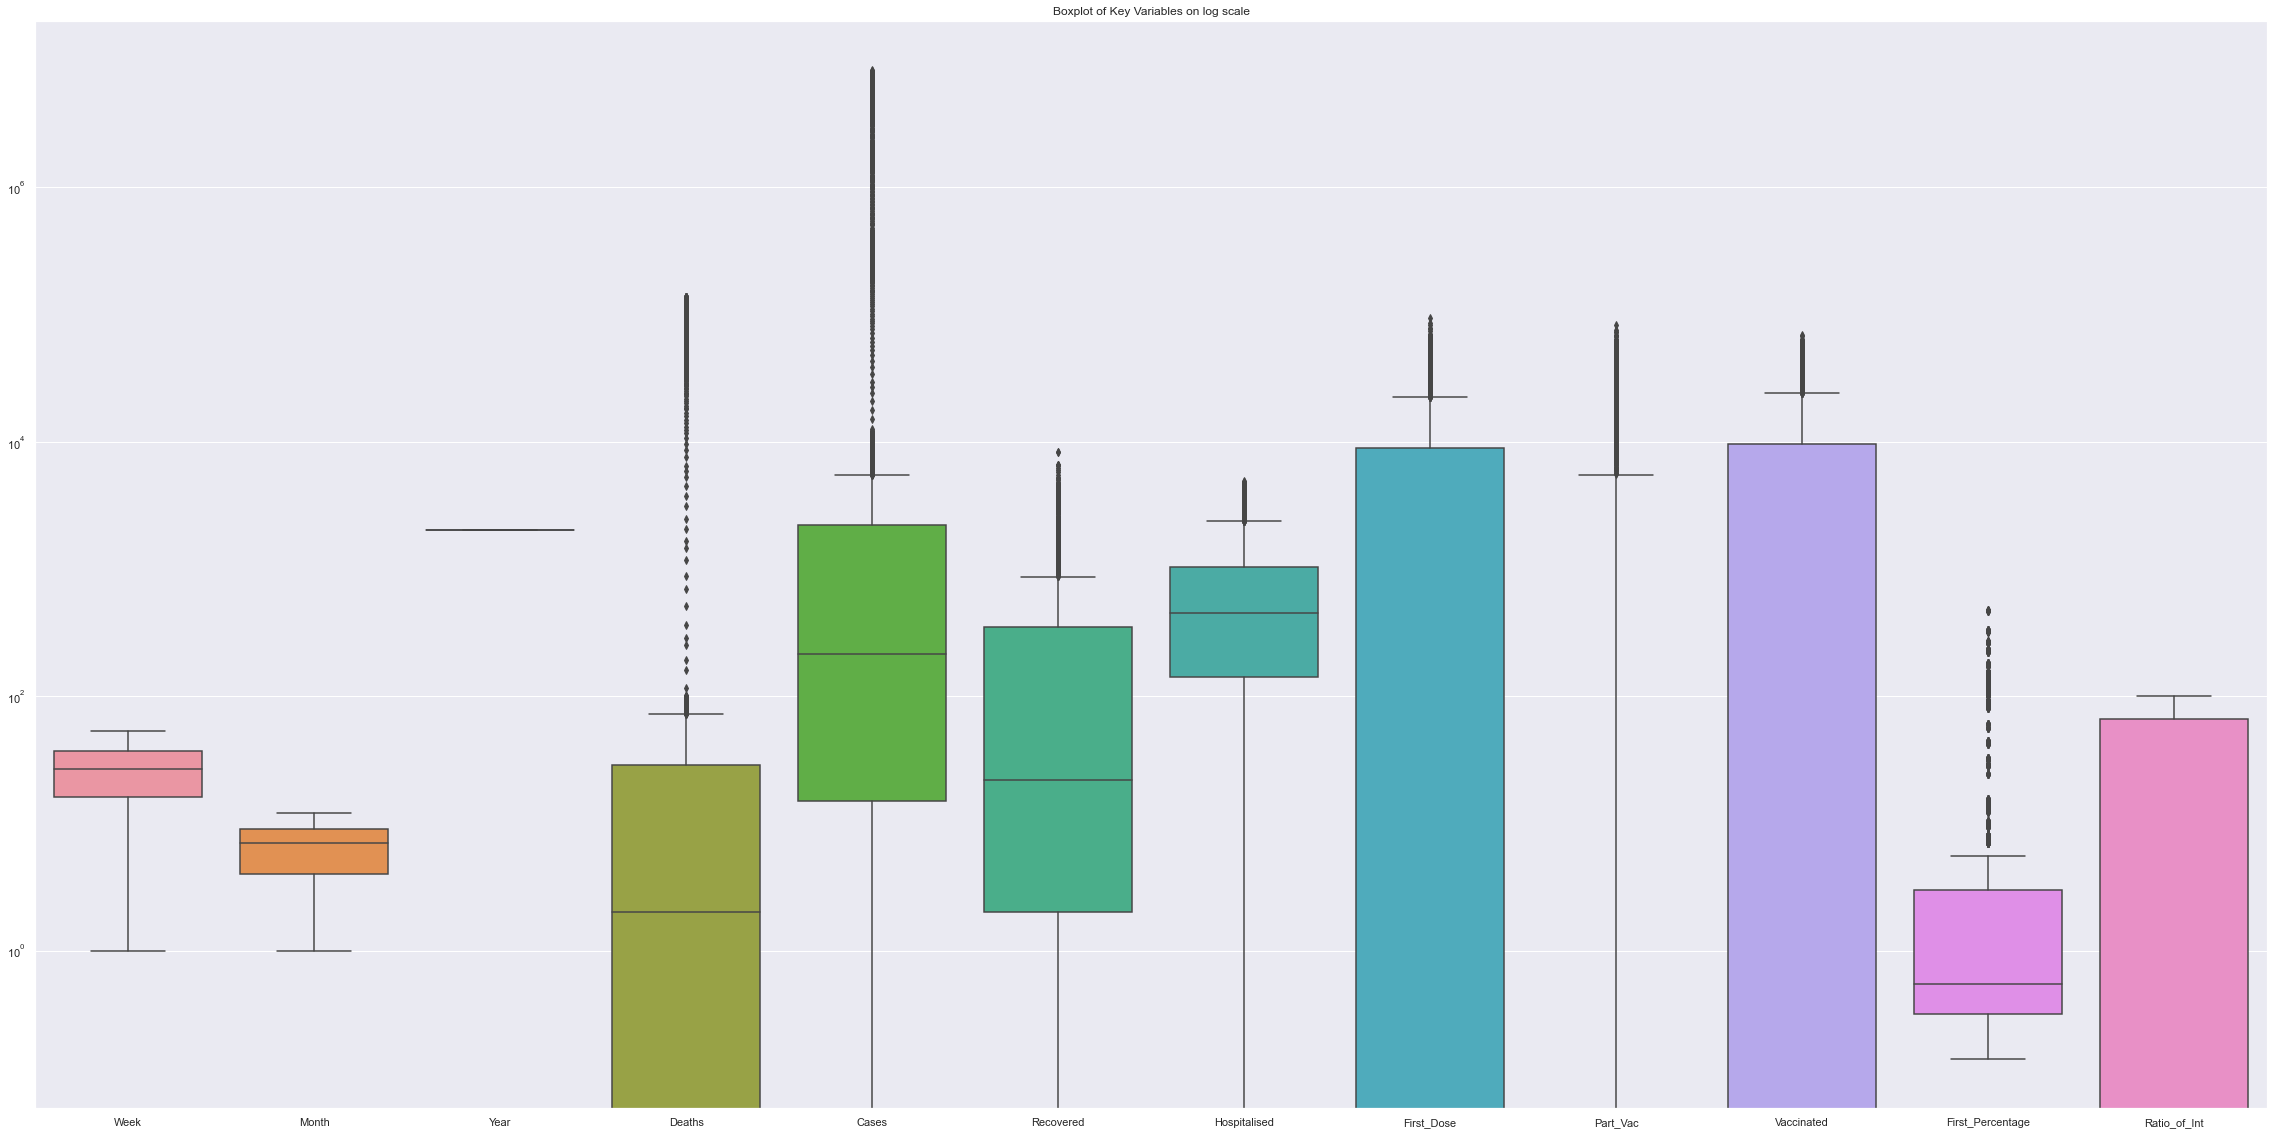

In [59]:
# Using log scale to replot.
g=sns.boxplot(data=covid_clean)
g.set_yscale('log')
g.set_title('Boxplot of Key Variables on log scale')
plt.show()

# Visualisation much clearer.
# Lots of values outside upper fence.
# Values outside upper fence = 'outliers'.

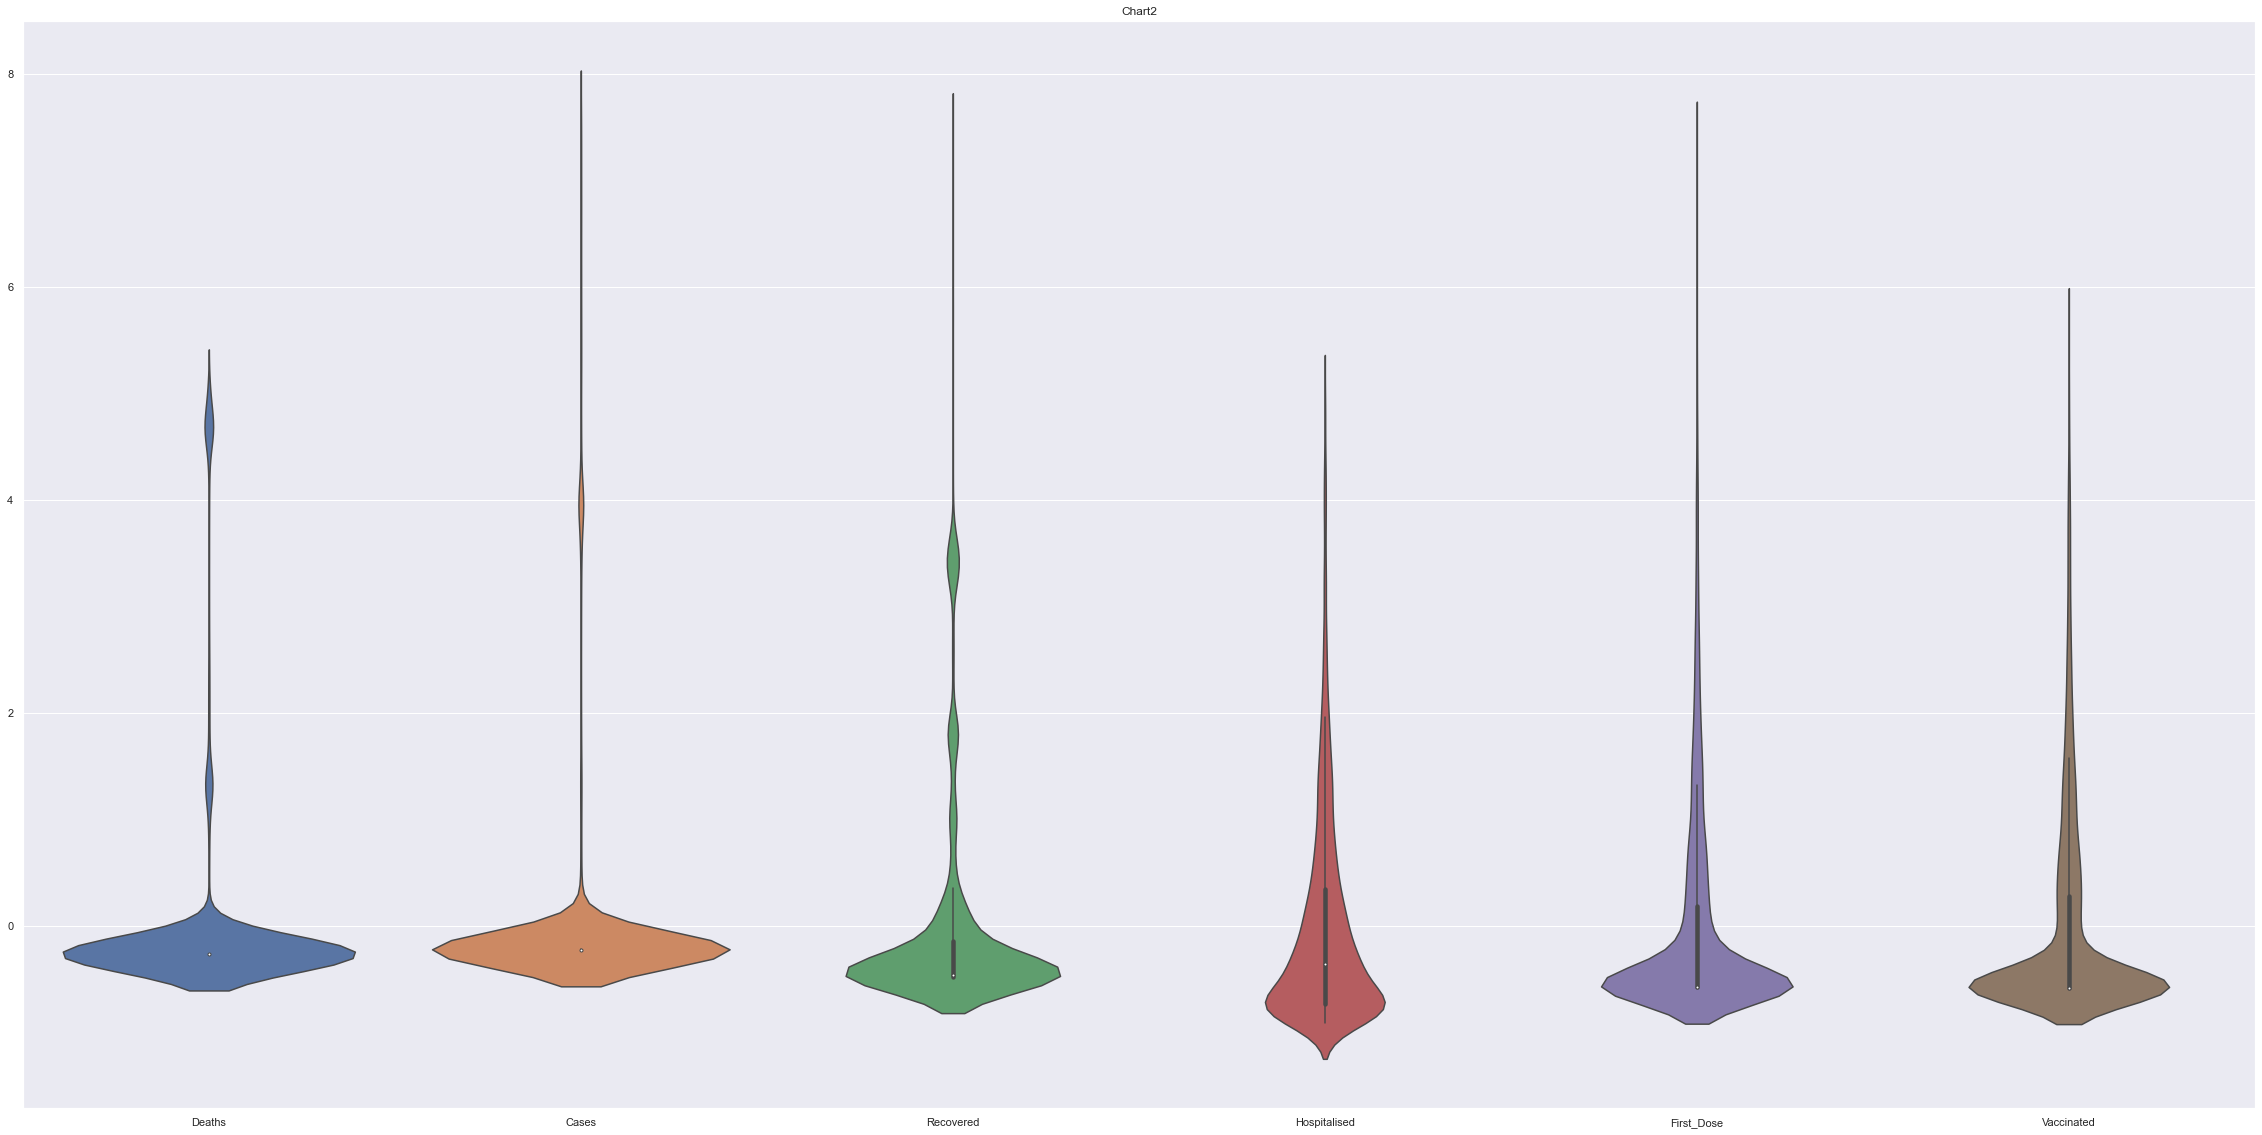

In [60]:
# Checking for distribution tails to measure "quality of outliers".
# Violinplot is best for visualising distribution tails. 
# Multi-modal distribution tails are not outliers.
# Remove unnecessary and dependant variables to improve the visualisation's focus.
covid_clean2 = covid_clean.drop(['Week', 'Month', 'Year', 'Province/State', 
                                 'Part_Vac', 'First_Percentage', 'Ratio_of_Int'], axis=1)

# Normalise the modified dataframe to narrow down the range of the magnitude of the variables
# Doesnt alter statistical properties of the variables.
normalized_covid_clean2=(covid_clean2-covid_clean2.mean())/covid_clean2.std()

# Set out the plot.
g=sns.violinplot(data=normalized_covid_clean2, showmedians=True, showmeans=True)
g.set_title('Chart2')

# Show plot
plt.show()

# Can see that all columns are fat tailed although Hospitalised less so.
# Some evidence of multi-modality in Deaths, Cases & Recovered.
# A column by column differentiate approach to outlier cleaning warranted.
# This will maintain distribution qualities such as multimodality.
# Beyond this, outliers can be replaced with interpolated values based on values from neighbouring rows.
# Outlier cleaning warranted across all columns albeit by different levels of aggresiveness.
# Deaths and Cases need most aggressive treatment as they have the most data points outside the box & most fat tailed.
# Hospitalised needs least agressive cleaning as it is comparitively thin tailed.

In [61]:
# Using Z-Score Method to replace outliers.
# Outliers replaced with neighbouring row interpolation.
d = covid_clean.Deaths
m = ((d - d.mean()) / d.std()).abs() > 1.5
covid_clean['Deaths'] = covid_clean['Deaths'].mask(m).interpolate()

In [62]:
# Apply the outlier replacement to the Cases column.
c = covid_clean.Cases
m = ((c - c.mean()) / c.std()).abs() > 1.5
covid_clean['Cases'] = covid_clean['Cases'].mask(m).interpolate()

In [63]:
# Apply the outlier replacement to the Recovered column.
r = covid_clean.Recovered
m = ((r - r.mean()) / r.std()).abs() > 1.5
covid_clean['Recovered'] = covid_clean['Recovered'].mask(m).interpolate()

In [64]:
# Apply the outlier replacement to the Hospitalised column.
h = covid_clean.Hospitalised
m = ((h - h.mean()) / h.std()).abs() > 1.5
covid_clean['Hospitalised'] = covid_clean['Hospitalised'].mask(m).interpolate()

In [65]:
# Apply the outlier replacement to the Vaccinated column.
v = covid_clean.Vaccinated
m = ((v - v.mean()) / v.std()).abs() > 1.5
covid_clean['Vaccinated'] = covid_clean['Vaccinated'].mask(m).interpolate()

In [66]:
# Apply the outlier replacement to the First_Dose column.
fd = covid_clean.First_Dose
m = ((fd - fd.mean()) / fd.std()).abs() > 1.5
covid_clean['First_Dose'] = covid_clean['First_Dose'].mask(m).interpolate()

In [67]:
# Apply the outlier replacement to the Part_Vac column.
pv = covid_clean.Part_Vac
m = ((pv - pv.mean()) / pv.std()).abs() > 1.5
covid_clean['Part_Vac'] = covid_clean['Part_Vac'].mask(m).interpolate()

In [68]:
# Apply the outlier replacement to the Ratio_of_Int column.
roi = covid_clean.Ratio_of_Int
m = ((roi - roi.mean()) / roi.std()).abs() > 1.5
covid_clean['Ratio_of_Int'] = covid_clean['Ratio_of_Int'].mask(m).interpolate()

In [69]:
# Apply the outlier replacement to the First_Percentage column.
fp = covid_clean.First_Percentage
m = ((fp - fp.mean()) / fp.std()).abs() > 1.5
covid_clean['First_Percentage'] = covid_clean['First_Percentage'].mask(m).interpolate()

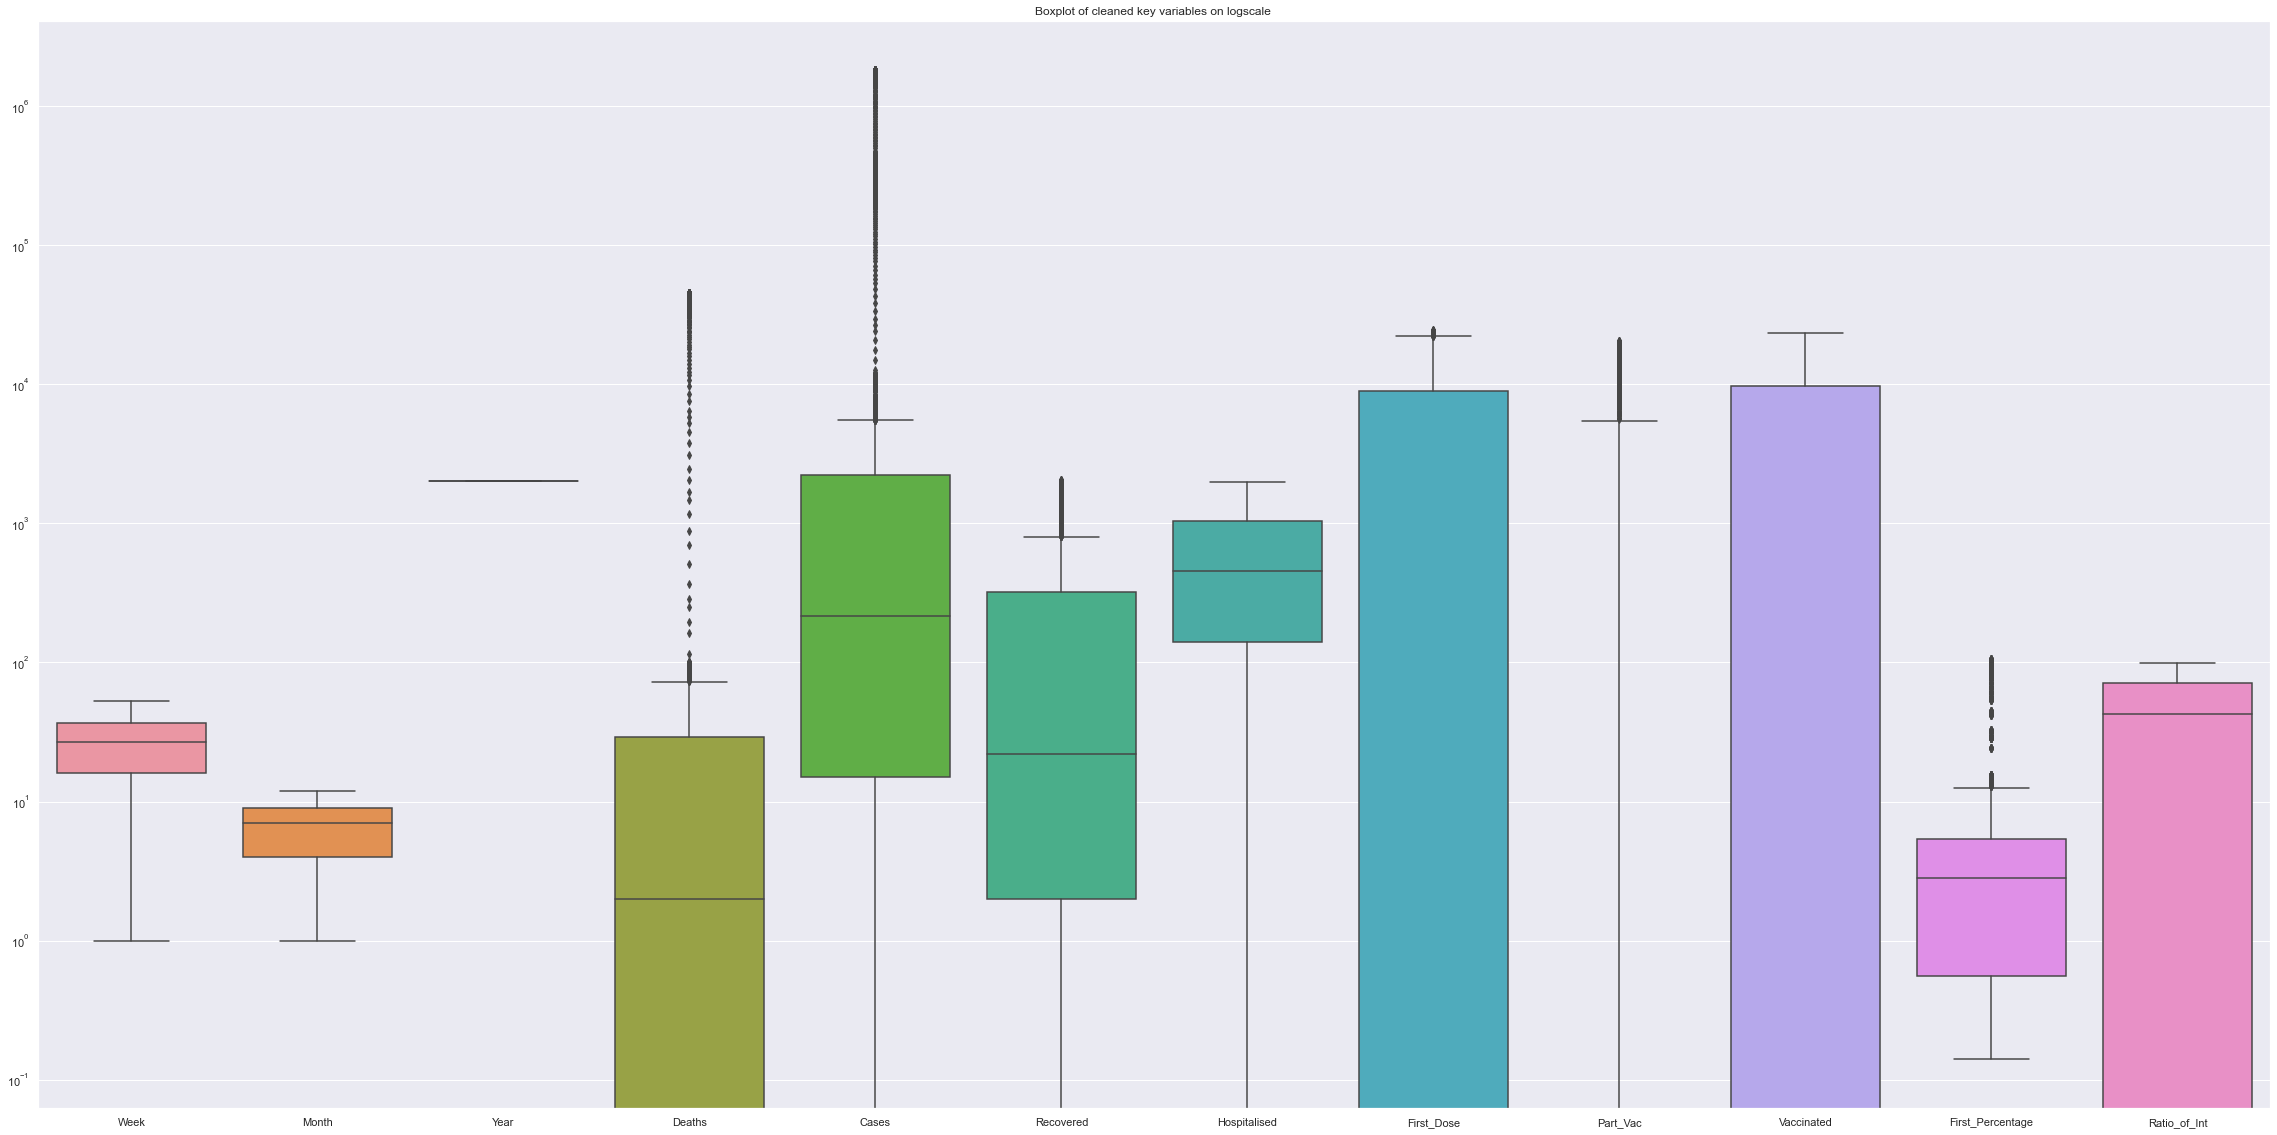

In [70]:
# Visualise after outliers have been replaced.
# Using boxplot first.
g=sns.boxplot(data=covid_clean)
g.set_yscale('log')
g.set_title('Boxplot of cleaned key variables on logscale ')
plt.show()

# As expected far fewer outliers across the board when compared to Chart1 above.
# Can see that the variables/columns have data on a very wide magnitude of range from the log scale below.
# Need to change the data such that all y axis values fall within a narrower range.
# This is called re-scaling/normalisation.
# For now will not normalise but instead use log scales for visualisation.
# Will revisit normalisation later if warranted.

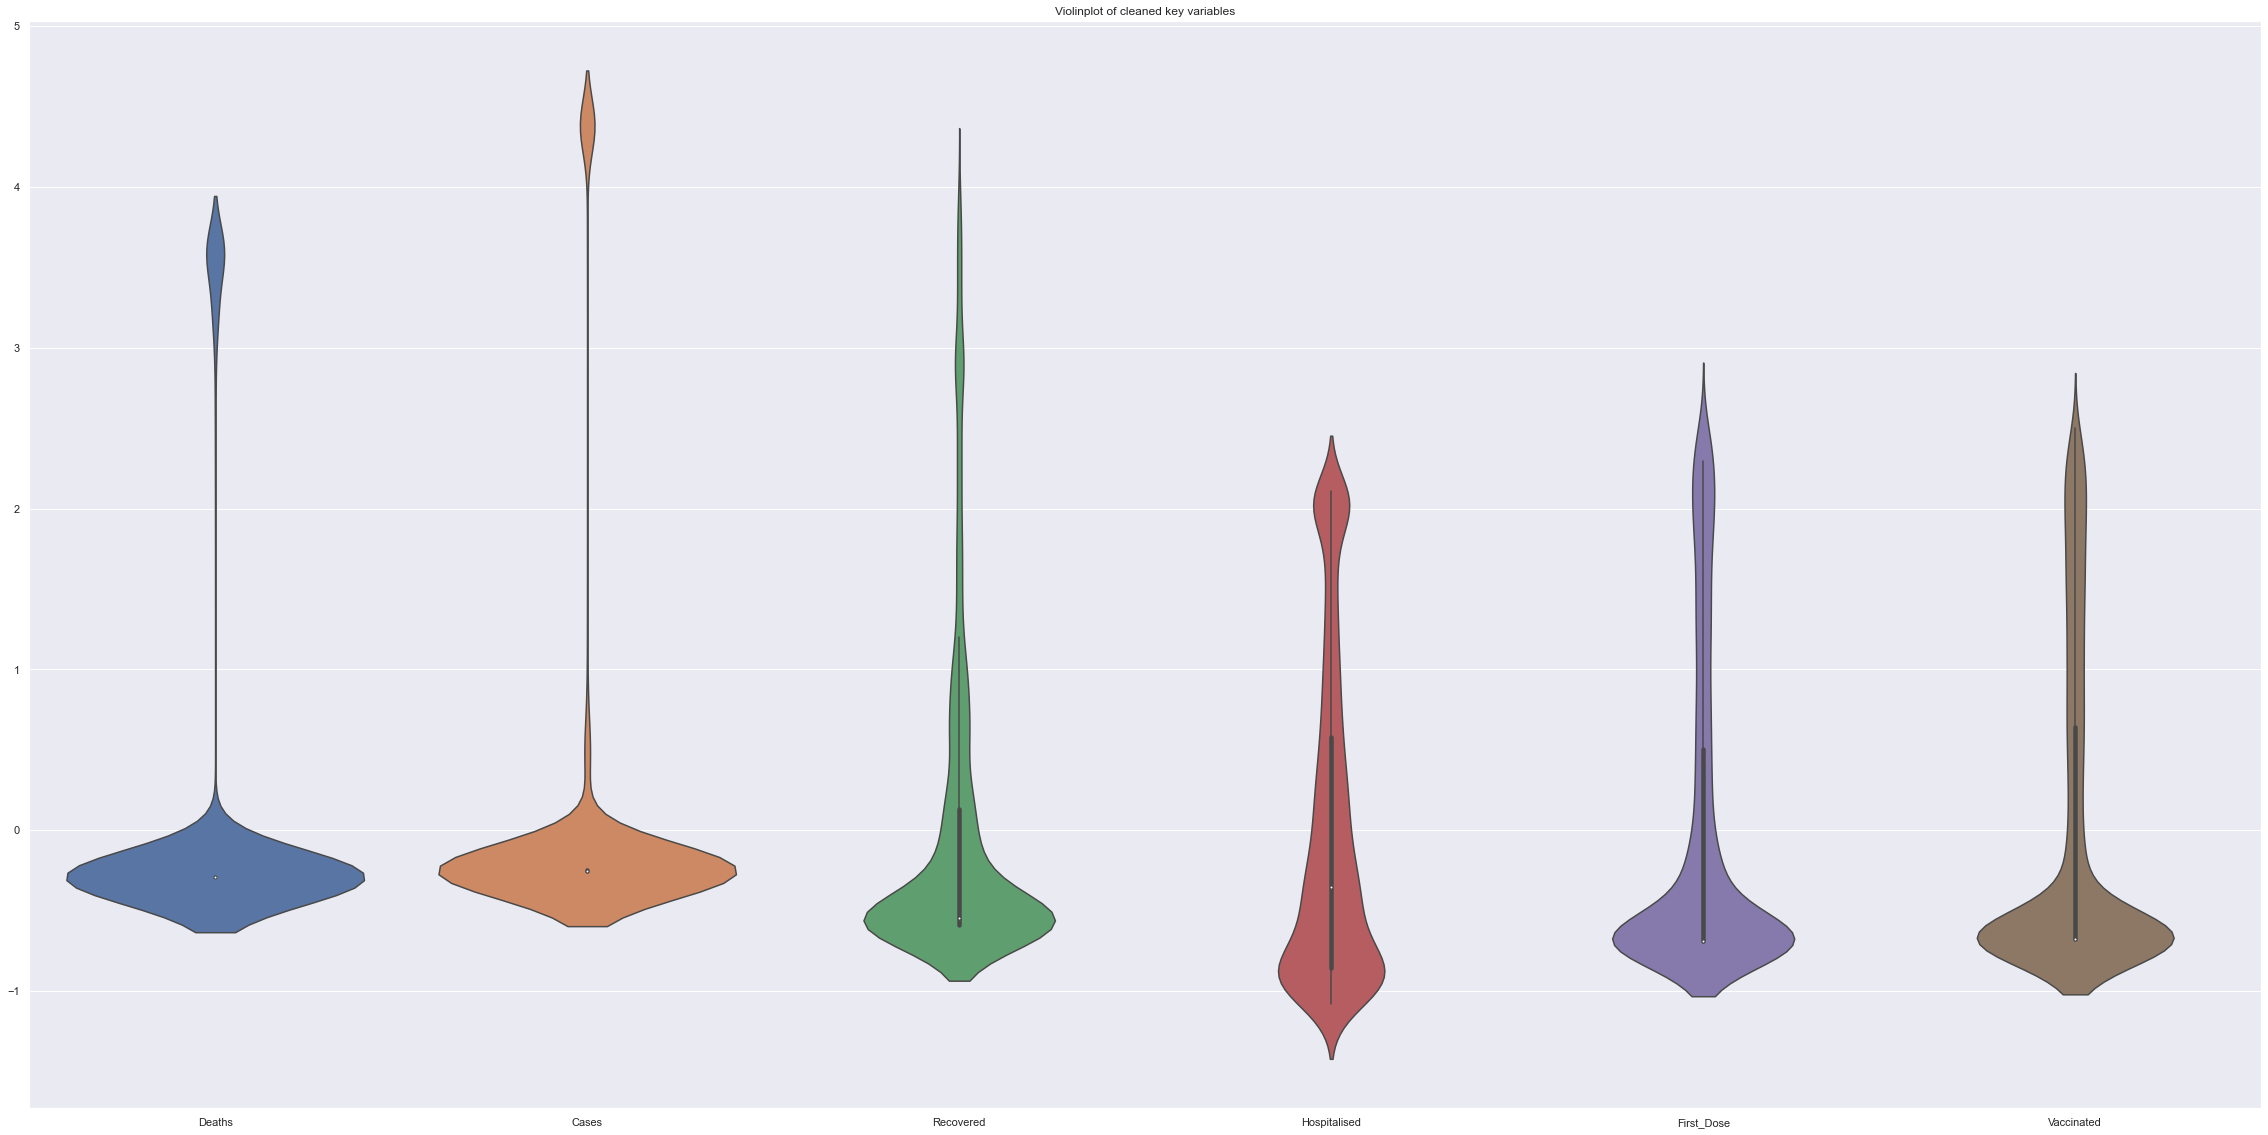

In [71]:
# Visualise distributions after outliers have been replaced.
# Using violinplot again.
# Remove unnecessary date parsing and calculated columns to improve the visualisation's focus.
covid_clean2 = covid_clean.drop(['Week', 'Month', 'Year', 'Province/State', 
                                 'Part_Vac', 'First_Percentage', 'Ratio_of_Int'], axis=1)

# Normalise the modified dataframe to narrow down the range of the magnitude of the variables
# Doesnt alter statistical properties of the variables.
normalized_covid_clean2=(covid_clean2-covid_clean2.mean())/covid_clean2.std()

# Setting up the plot.
g=sns.violinplot(data=normalized_covid_clean2, showmedians=True, showmeans=True)
g.set_title('Violinplot of cleaned key variables')

# Show plot
plt.show()

# Unfortunately this vis isnt great to much sense of the transformation versus earlier in Chart 2.
# This is because some time series related columns such as Week, Month etc are corrupting the visualisation.
# Clean up some unnecessary coloumns and plot again.

### Visualise & Identify Initial Trends

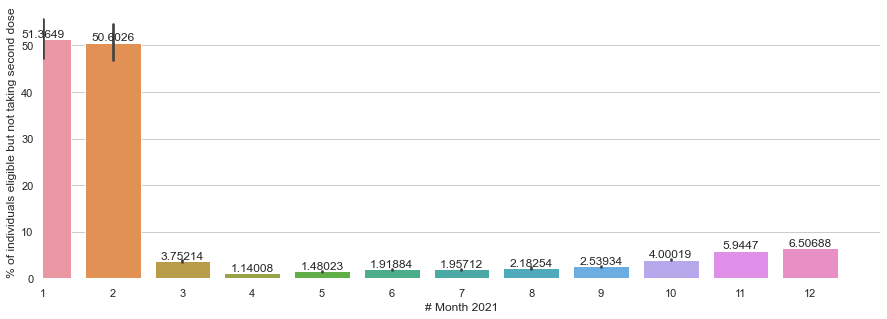

<Figure size 2880x1440 with 0 Axes>

In [72]:
# Determining uptake of second dose amongst those who have taken first dose
# Plotting vertical Bar Graph
# Plotting First Percentage as a time series.
# Setting the style
sns.set_theme(style="whitegrid")
from matplotlib.ticker import FormatStrFormatter


# Initialize the matplotlib figure
f, g = plt.subplots(figsize=(15, 5))

# Grouped by Province/State
df=covid_clean.groupby(['Month','Province/State'], as_index=False)['First_Percentage'].sum()

# Plotting the graph
g=sns.barplot(x = covid_clean["Month"], y = covid_clean["First_Percentage"])

# Add a legend and informative axis label
g.set(xlim=(0, 12), ylabel="% of individuals eligible but not taking second dose",
       xlabel="# Month 2021")
sns.despine(left=True, bottom=True)

# Adding Labels on the plot
# Use Y value as label and format number with one decimal place
g.bar_label(g.containers[0])

# Display
plt.show()

# Saving the Seaborn Figure:
plt.savefig('t-series_First_Percentage.png')

# Shows that there is a slow rise in number of individuals who are eligible for the second dose
# But havent taken it yet.

Text(0.5, 1.0, 'Deaths across regions over time')

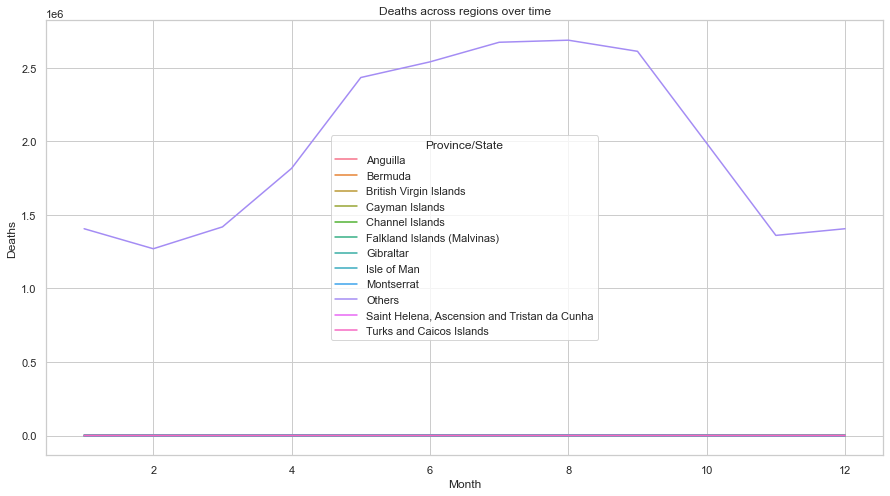

In [73]:
# Group the data by Province/State and Date, and aggregate the death count.
# Creating the df first per above.

df=covid_clean.groupby(['Month','Province/State'], as_index=False)['Deaths'].sum()

# Setting the size
sns.set(rc = {'figure.figsize':(15,8)})

# Setting the style
sns.set_theme(style="whitegrid")

# Visualising trend of deaths across all regions
g=sns.lineplot(x="Month", y="Deaths", data=df, hue='Province/State')
g.set_title('Deaths across regions over time')

# Very clear that death count from "Others" is skewing the data.
# Plot again on log scale.

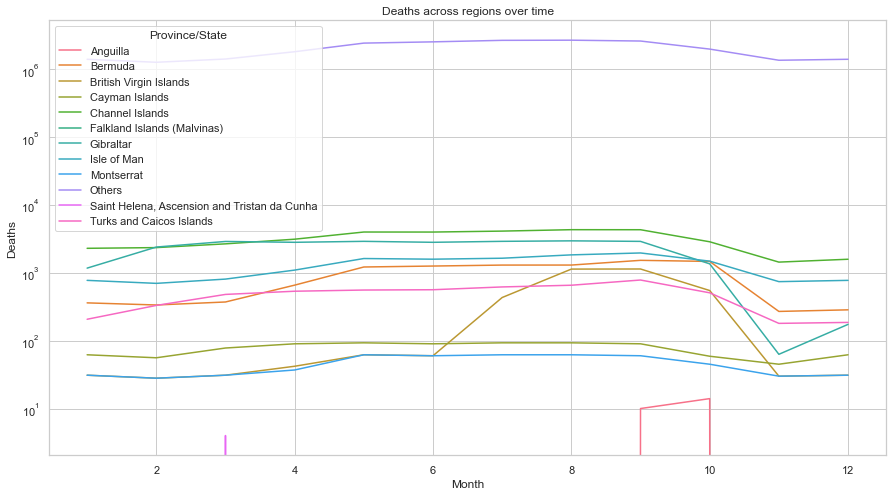

In [74]:
# Setting on log scale to remove the effect of vast difference in scale of numbers within the variable, Deaths. 
# Visualising trend of deaths across all regions

g=sns.lineplot(x="Month", y="Deaths", data=df, hue='Province/State')
g.set_title('Deaths across regions over time')
g.set_yscale('log')

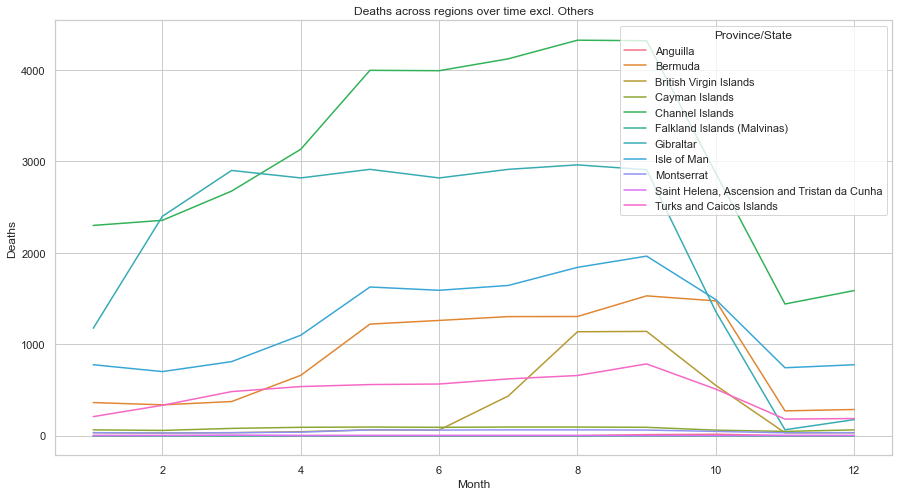

In [75]:
# Alternatively drop "Others" from the dataframe
# Creating a new dataframe where any rows where the Province/State = 'Others' is dropped.
# Selecting all "Province/State" except 'Others'.
df2= df[df["Province/State"].str.contains("Others") == False]

g=sns.lineplot(x="Month", y="Deaths", data=df2, hue='Province/State')
g.set_title('Deaths across regions over time excl. Others')

# Exporting the plot into a shareable PNG
plt.savefig('Deaths_across_regions_ex_Others.png')

# See that most other regions had very low deaths too as they still dont show properly.
# Probably too many variables to plot in one chart. 
# Could be neat to split this into two charts.
# Deaths have peaked and monthly aggregates in even the high death regions are still declining rapidly.

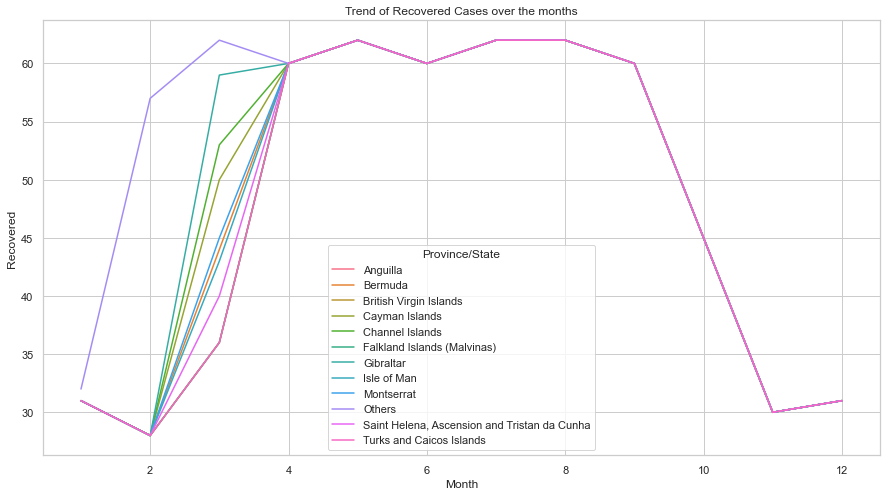

In [76]:
# Group the data by Province/State, 
# Aggregate the count of recovered cases and sort the values of recovered cases in ascending order.
# Creating the dataframe as above
df=covid_clean.groupby(['Month','Province/State'], as_index=False)['Recovered'].count()

# Visualising the output of df on a lineplot.
g=sns.lineplot(x="Month", y="Recovered", data=df, hue='Province/State')
g.set_title('Trend of Recovered Cases over the months')

# Exporting the plot into a shareable PNG
plt.savefig('Trend_Recovered_Cases_over_months.png')

# Trends broadly the same across all Province/States.
# Big increase in Recovered Cases after Feb 2021
# Stable for the next few months.
# A big drop in recovered cases since Sep 2021
# Same time as slow rise in number of individuals who are eligible for the second dose who havent taken it yet. 
# Should look at what happens to cases reported over this period.

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\3241064588.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=covid_clean.groupby(['Week'], as_index=False)['Deaths', 'Vaccinated'].agg({'Deaths': 'sum',


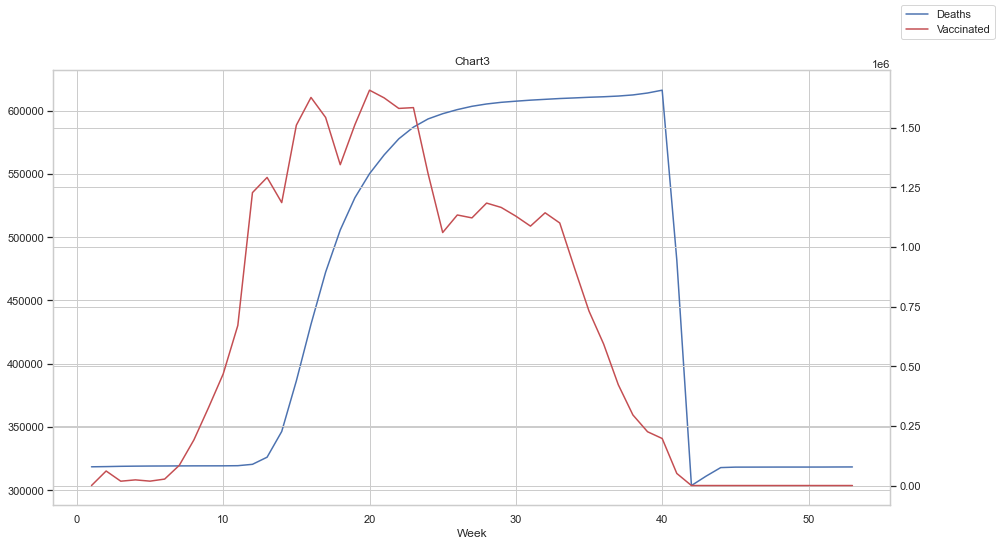

In [77]:
# Plotting related aggregated data to investigate for visual relationships between some variables
# Explore impact of both doses being administered = Vaccinated on Total Deaths 
# Looks at aggregated numbers of Deaths, & administration of both first and second doses.
# Use weekly data to get more granular view

# Creating the dataframe
df=covid_clean.groupby(['Week'], as_index=False)['Deaths', 'Vaccinated'].agg({'Deaths': 'sum',  
                                                                               'Vaccinated': 'sum'})
ax = df.plot(x="Week", y="Deaths", legend=False)
ax2 = ax.twinx()
df.plot(x="Week", y="Vaccinated", ax=ax2, legend=False, color="r")
ax.set_title('Chart3')
ax.figure.legend()
plt.show()

# The variables Deaths & Vaccinated move together
# Looks like there is a lagged impact which isnt coming across here due to X axis not being fully synchronised.

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\3741293315.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


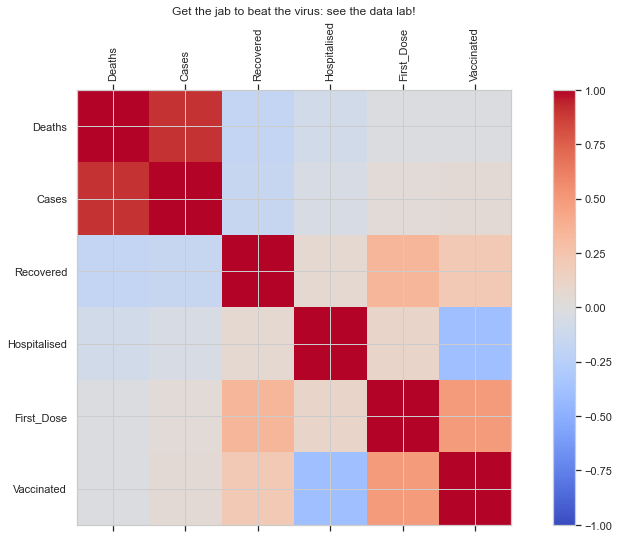

In [78]:
# There are too many columns and rows for visual checks for correlations to clearly come through.
# So many data points dont allow for particular relationships between variables being easily identified.
# We can employ Python's statistical capabilities to get a quick over-view by running correlations.
# The “corr()” method evaluates the correlation between all the variable, then it can be graphed with a color coding.

# Prepare the dataframe
# Drop  time parsing related & calculated variable columns which currently appear as independent variables in the dataframe.
# This will remove obvious but spurious correlations obscuring the analysis. 
covid_clean2 = covid_clean.drop(['Week', 'Month', 'Year', 'Province/State', 
                                 'Part_Vac', 'First_Percentage', 'Ratio_of_Int' ], axis=1)

# Setting up the correlation matrix
corr = covid_clean2.corr()

#Plotting the matrix.
fig = plt.figure()
ax = fig.add_subplot(111)

# Introducing heatmap
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_title('Get the jab to beat the virus: see the data lab!')

# Setting up the display properties of the plot
ticks = np.arange(0,len(covid_clean2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(covid_clean2.columns)
ax.set_yticklabels(covid_clean2.columns)

# Saving the plot into a shareable PNG
plt.savefig('COVID-19_correlation_matrix.png')

# Visualise the correlation matrix.
plt.show()

# When there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. 
# The darkest red means there is a perfect positive correlation.
# Blue implies negative correlation.
# The darkest blue means there is a perfect negative correlation.
# The standout and rather obvious observation from this analysis is the positive correlation between Cases & Deaths.
# There is also reasonably strong correlation between Vaccinated & First Dose.
# This implies that those who have only taken the first dose shouldnt require too much persuasion to get double jabbed.
# Would have been interesting to establish correlations between effect of vaccines and deaths as shown in Chart 3 above.
# However this isnt coming up in the matrix which does not factor time lags as it stands here.
# There is also a significant negative correlation between being fully Vaccinated and being hospitalised.
# This may imply that the vaccine reduces the severity of the infection.
# As such requirement to be hospitalised is reduced.
# However there could also be other factors at play which might explain this seemingly symbiotic relationship.
# Simple quantitative data analysis such as this wont reveal such factors.
# For example, it could be that in the early days, medical professionals under pressure panicked & over-hospitalised patients.
# Over time, as the panic subsided and doctors understood the infection better, they perhaps were more measured. 
# Thus hospitalisations dropped.
# We need qualitative data to investigate this further.

### Summaries & Observations from the Quantitative Data

There are some strong, consistent themes with respect to timing as the variables; the key highlights:

- There is a good amount of data albeit not real life credible; discussion on this aspect in the main report.
- As vaccines get rolled out, death declines
- The 'risky' variables appear to move in tandem with changes in vaccine uptake & numbers of fully vaccinated.
- The Province/State 'Others' should be stripped out for further study away from this exercise.
- The data is so vastly different in order of magnitude, its creating skews which are masking potential meaningful insights.
- The difference in magnitude makes meaningful comparative studies futile.
- One way to resolve this may be to aggregate all other various regions and then set up a comparative study with 'Others'.
- This may mask other important nuances of certain regions.
- Another method to resolve this problem of scale could be to normalise the whole data set.
- On normalisation, all variable values would fall within a predetermined range of values but wouldnt effectively solve the problem caused by the wide magnitude of data scale.
- Converting the data from daily to months made studying the data as time-series much easier.
- Daily observations are too noisy.
- Deaths have peaked in the summer of 2021 although they appear to be rising again.
- Both Deaths and Recovereds show very similar bi-modal distribution characteristics.
- Indicates there were two peaks over the summer of 2021.
- No idiosyncratic regional trends discovered yet.
- St. Helena, Ascension & Tristan da Cunha may be marginally better at recoveries although it wasnt so at the start of the pandemic.
- Most visualisations need a lot more work in terms of quality of presentation.
- The correlation matrix is a neat tool but assumes some basic statistical knowledge & may not be suitable for all audiences.
- There are many problems with this data set in terms of real life credibility; as such correlations should be treated with caution. They are intended to give a sense of trends and themes to the audience & not for use in decision making at this stage.
- Visualisations alone wont be sufficient to make decisions but should assist in generating the big picture storyboard in the minds of the government.
- There should be multivariate, spatial amongst other statistical analysis done on the data to generate actionable insights once the real world credibility of the underlying data is resolved.

## Analysing Twitter Data

#### Further look at the text column

In [79]:
# List of values containing the # symbol.
tweets.loc[tweets['text'] != '#']

# Every single row contains at least one # symbol.

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,19/05/2022,1.527280e+18,1.527280e+18,NORTHERN IRELAND. Announced on THURSDAY.\n\nC...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
3956,18/05/2022,1.526910e+18,1.526910e+18,NORTHERN IRELAND. Announced on WEDNESDAY.\n\n...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3957,17/05/2022,1.526550e+18,1.526550e+18,NORTHERN IRELAND. Announced on TUESDAY.\n\nCO...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3958,16/05/2022,1.526190e+18,1.526190e+18,NORTHERN IRELAND. Announced on MONDAY.\n\nCOV...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN


### Some basic descriptive analysis of the dataset tweets.csv


#### Averages

In [80]:
# Average Number of times a tweet is retweeted.
tweets = tweets.sort_values(by='retweet_count', ascending=False)
tweets = tweets.reset_index(drop=True)

# Displaying results to nearest whole number
round(tweets['retweet_count'].mean(),0)

# We see than on average, a tweet is re-tweeted a further 3 times

3.0

In [81]:
# Counting how many times a tweet has been re-tweeted.
# We have to revisit the original dataframe loaded from csv file
# Recall re_tweet count was dropped earlier in this exercise 
rt=tweets['retweet_count'] > 0
rt.value_counts()

# Shows that 1142 tweets were retweeted at least once.

False    2818
True     1142
Name: retweet_count, dtype: int64

In [82]:
# Average number of likes 
tweets = tweets.sort_values(by='favorite_count', ascending=False)
tweets = tweets.reset_index(drop=True)

# Displaying results to nearest 2 decimals.
round(tweets['favorite_count'].mean(),2)

# We can see that an average tweet is marked favourite 10 times.

10.44

In [83]:
# Count the number of times a tweet has been made favourite.
fav=tweets['favorite_count'] > 0
fav.value_counts()

# Shows that 1720 tweets were marked as favourite by someone at least once.

False    2240
True     1720
Name: favorite_count, dtype: int64

#### Top trending

In [84]:
# Creating a dataframe that contains just the text column from the tweets df.
# Converting the datatype in column 'text' as string.
tweets['text'] = tweets['text'].astype(str)

# Creating the dataframe.
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else none)

# From the new df, creating a dict/list of all values with '#' in it.
tags = [x for x in tweets_text if x.startswith('#')]
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)


            
#Create a Series from the dictionary
tags=pd.Series(tags).value_counts()

In [85]:
#Identify 30 most popular hashtags.
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#CoronaUpdate             84
#PeoplesVaccine.          84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#data                     66
#datascience              66
#analytics                64
#Covid_19                 63
#datavisualization        63
#Shanghai                 63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [86]:
# Convert into a dataframe
df = pd.DataFrame(tags).reset_index()
print(df.dtypes)

index    object
0         int64
dtype: object


In [87]:
# Rename columns
df.columns = ['word', 'count']
df['count'] = df['count'].astype(int)
df

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
...,...,...
5154,#COVID19\nhttps://t.co/yYOaiJQXMn,1
5155,#Emergency,1
5156,#Apocalypse,1
5157,#WSJTechLive,1


In [88]:
# Display hashtags which have been tweeted at least 100 times.
# This will further filter for significance of these hashtags.
df[df['count']>100]

# Can see actually very few really popular hashtags.
# Top 5 are all Covid-19 related.
# We should actually look for distinct words as a lot of the count is distorted by syntax.
# No real difference between COVID19, Covid19 & covid19 for example.
# Only distinct hashtags are Covid19, CovidIsNotOver, China and Greece.
# What was happening in Greece around this time?!

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103


Text(0.5, 1.0, 'Top Trending Hashtags')

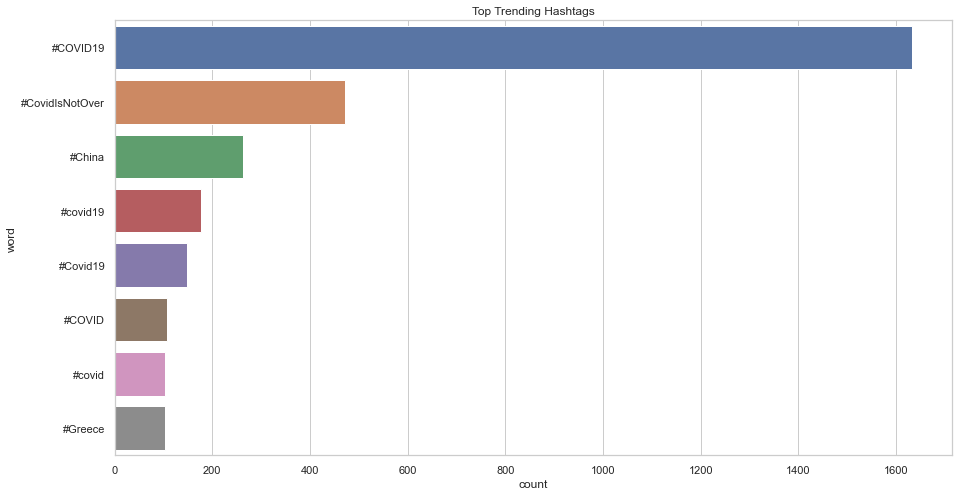

In [89]:
# Visualising the table above.
g = sns.barplot(x="count", y="word", data=df.loc[(df['count']>100)])
g.set_title('Top Trending Hashtags')

# Very few meaningful insights here.
# Dataset is too small and over a very short period of time.
# Could see how these top trending hashtags evolve over the whole period of our quantitative analysis earlier.

### Summaries & Observations from Qualitative Data

The dataset provided is too small to provide meaningful insights.  Despite this, there are a handful strong, consistent themes that are worthwhile pointing out:

- Assuming that the data provided was from a period that was randomly selected, Twitter should be medium that the government targets to get its messaging on COVID across. 
- There is a significant level of animation amongst Twitter users in relation to COVID-19.
- Within the data provided, COVID was the highest trending hashtag by a great magnitude.
- Any government communication on the topic on Twitter will get a lot of eyeballs & can be thus very effective.
- Additional sentiment analysis would be a very worthwhile endeavour on a bigger dataset. 


### Week 6 Assignment
The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?


In [90]:
# Create a special dataframe for the Province/State = Channel Islands
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [91]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [92]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [93]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

#### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

C:\Users\saura\AppData\Local\Temp\ipykernel_20644\506861888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_ci['Date'] = pd.to_datetime(sample_ci['Date'], format="%d/%m/%Y")
C:\Users\saura\AppData\Local\Temp\ipykernel_20644\506861888.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_ci['7d_MovingAvg'] = ((sample_ci['Hospitalised']).rolling(window=7).mean())


Text(0.5, 1.0, '7day moving average of number of Hospitalisations in the Channel Islands')

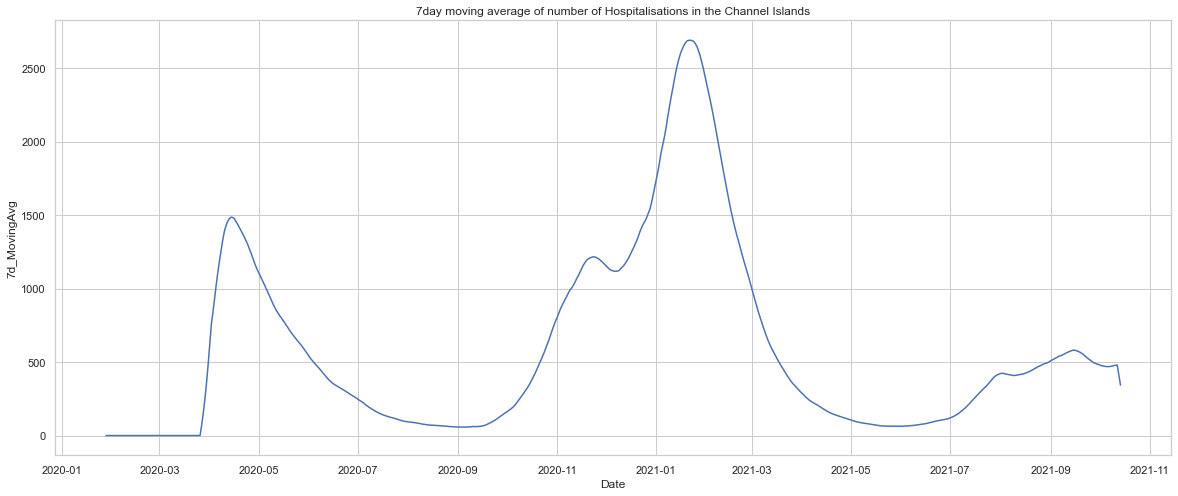

In [94]:
# Demonstrate the use of the function to plot moving averages.

# First we need to ensure that we have all the environment set up.
# I have added a couple of libraries I need to the start cell.
# Converting the date column into datetime object.
# This is called parsing. 
# This is needed to calculate moving averages.
sample_ci['Date'] = pd.to_datetime(sample_ci['Date'], format="%d/%m/%Y")

# Calculating the 7 day moving average of Hospitalised numbers
# Inserting this calculated value as a new column within the existing dataframe, sample_ci
sample_ci['7d_MovingAvg'] = ((sample_ci['Hospitalised']).rolling(window=7).mean())

# We can change the number in the function above 'window=7' any other number that we wish to have to calculate moving average.
# For example if we wanted 20 day moving average, it would read window=5 in the function above.

# Now plotting this into a graph to show the 7 day moving average of the number of Hospitalisations in the Channel Islands.
# X Axis is time = 'Date'
# Y Axis = 7 day moving average of 'Hospitalised'

# Setting size of the plot.
plt.figure(figsize = (20,8))

# Visualising the graph.
g=sns.lineplot(x="Date", y="7d_MovingAvg", data=sample_ci)

# Set out chart title.
g.set_title('7day moving average of number of Hospitalisations in the Channel Islands')

# Moving averages are useful to identify the trend direction of a variable. 
# This output is too eractic with very large errors to be meaningful in informing our objective.
# Furthermore we need much longer time series data before we can deploy them for predictive purposes.
# Will be useful nevertheless to return to this once we have real world data & longer time series.

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [95]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,7d_MovingAvg,error
2593,Channel Islands,2020-03-27,509.0,72.714286,436.285714
2594,Channel Islands,2020-03-28,579.0,155.428571,423.571429
2595,Channel Islands,2020-03-29,667.0,250.714286,416.285714


- The above function calculates the 7day moving average of Hospitalisations in the Channel Islands.
- It also displays the actual number of Hospitalisations on the day. 
- Together, the two numbers are useful to identify the trend in which the actual number is going to move in the future. 
- If the moving average is less than the actual number on the day, it would typically signal that the actual numbers are on an uptrend and thus likely to continue to increase. There are other factors which may be used to better understand the signal provided by this difference between the moving average and the actual number on the day. However, this is out of scope for this assignment.
- The mean absolute error as shown in the Column 'error' in the table above shows the accuracy/strength of the signalling generated by the moving average as described above.
- The output in the table has been sorted in descending order of mean absolute error.
- Displayed in this manner, we can very easily identify the days when the predictive power of the 7d Moving Average was at its least capable. 
- Beyond this, displaying it in this manner has no value. Typically, given such studies are carried out on very large datasets, you would not display the output in this manner except to quickly check the worst case predictive power of the forecasting tool. 
- Output of this variety is very useful for predictive technologies especially for time series forecasting. It has little value in static data analysis.

### Question 3:
The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Quantitative data is numbers based and therefore measured. Qualitative data is descriptive and whilst it can be observed, there is no way to measure them. The techniques used for the collection and analysis is unique to each data type although certain subsets are shared.

Both data types have their place in being used for business predictions. Quantitative data is typically more readily available and thus useful for analysis on the fly. However, it can lack depth and on a stand-alone basis provides no context. Put simply, whilst quantitative data is useful for facts, qualitative data is a powerful story telling tool whilst keeping that story anchored in the real world. 

If you are running a business, it is crucial to know not just how your business is performing financially but also within its wider eco system with respect to customer and employee engagements and environmental impact amongst other measures.

For further discussion on this topic, I have found [this article](https://www.linkedin.com/pulse/20140920165433-34529931-qualitative-quantitative-decision-making/) to be particularly helpful. 

#### Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement techniques are used as a strategy to proactively make consistent and iterative enhancements. These techniques can be used to improve products, processes and people. Simply put, it's the best way to ensure we are always at the boundaries of efficiency and knowledge . If continuous improvement processes are not in place and the focus instead is on task deliveries, over time productivity and market value will decline. Afterall, Rome wasn't built in a day but it did burn to the ground almost overnight!

#### As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Data ethics whilst nuanced and complicated, cannot be ignored by any organisation that is not beyond the reach of the law and/or public opinion. Data can be supremely powerful but with great power comes great responsibility; primarily to ensure that the data is used for the appropriate use cases. 

In this specific case, using public health data which is ultimately aggregated from personal data can:

- cause further damage to public health and the economy if policy is formed basis erroneous data techniques.

- lead to breaches in confidentiality guaranteed by the law if the data is not handled appropriately. Ultimately, this could lead to legal action being taken against the government.